## Linear Regression on the winequality-red Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
df.head() #first five rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
df.isnull().any()


fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
df = df.drop('quality', axis=1) #since it is a categorical data there is no use of this variable for model building


In [ ]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [ ]:
ph_column = df.pop('pH')


In [ ]:
df['pH'] = ph_column

In [ ]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                    11.0                  34.0  0.99780       0.56      9.4   
1                    25.0                  67.0  0.99680       0.68      9.8   
2                    15.0                  54.0  0.99700       0.65      9.8   
3                    17.0                  60.0  0.99800       0.58      9.8   
4                    11.0                  34.0  0.99780       0.56      9.4   
...                   ...                   ...      ...        ...      ...   
1594                 32.0                  44.0  0.99490       0.58     10.5   
1595                 39.0                  51.0  0.99512       0.76     11.2   
1596                 29.0                  40.0  0.99574       0.75     11.0   
1597                 32.0                  44.0  0.99547       0.71     10.2   
1598                 18.0                  42.0  0.99549       0.66     11.0   

        pH  
0     3.51  
1     3.20  
2     3.26  
3     3.16  
4     3.51  
...    ...  
1594  3.45  
1595  3.52  
1596  3.42  
1597  3.57  
1598  3.39  

[1599 rows x 11 columns]

## Exploratory Data Analysis

## Box-Plot

<Axes: >

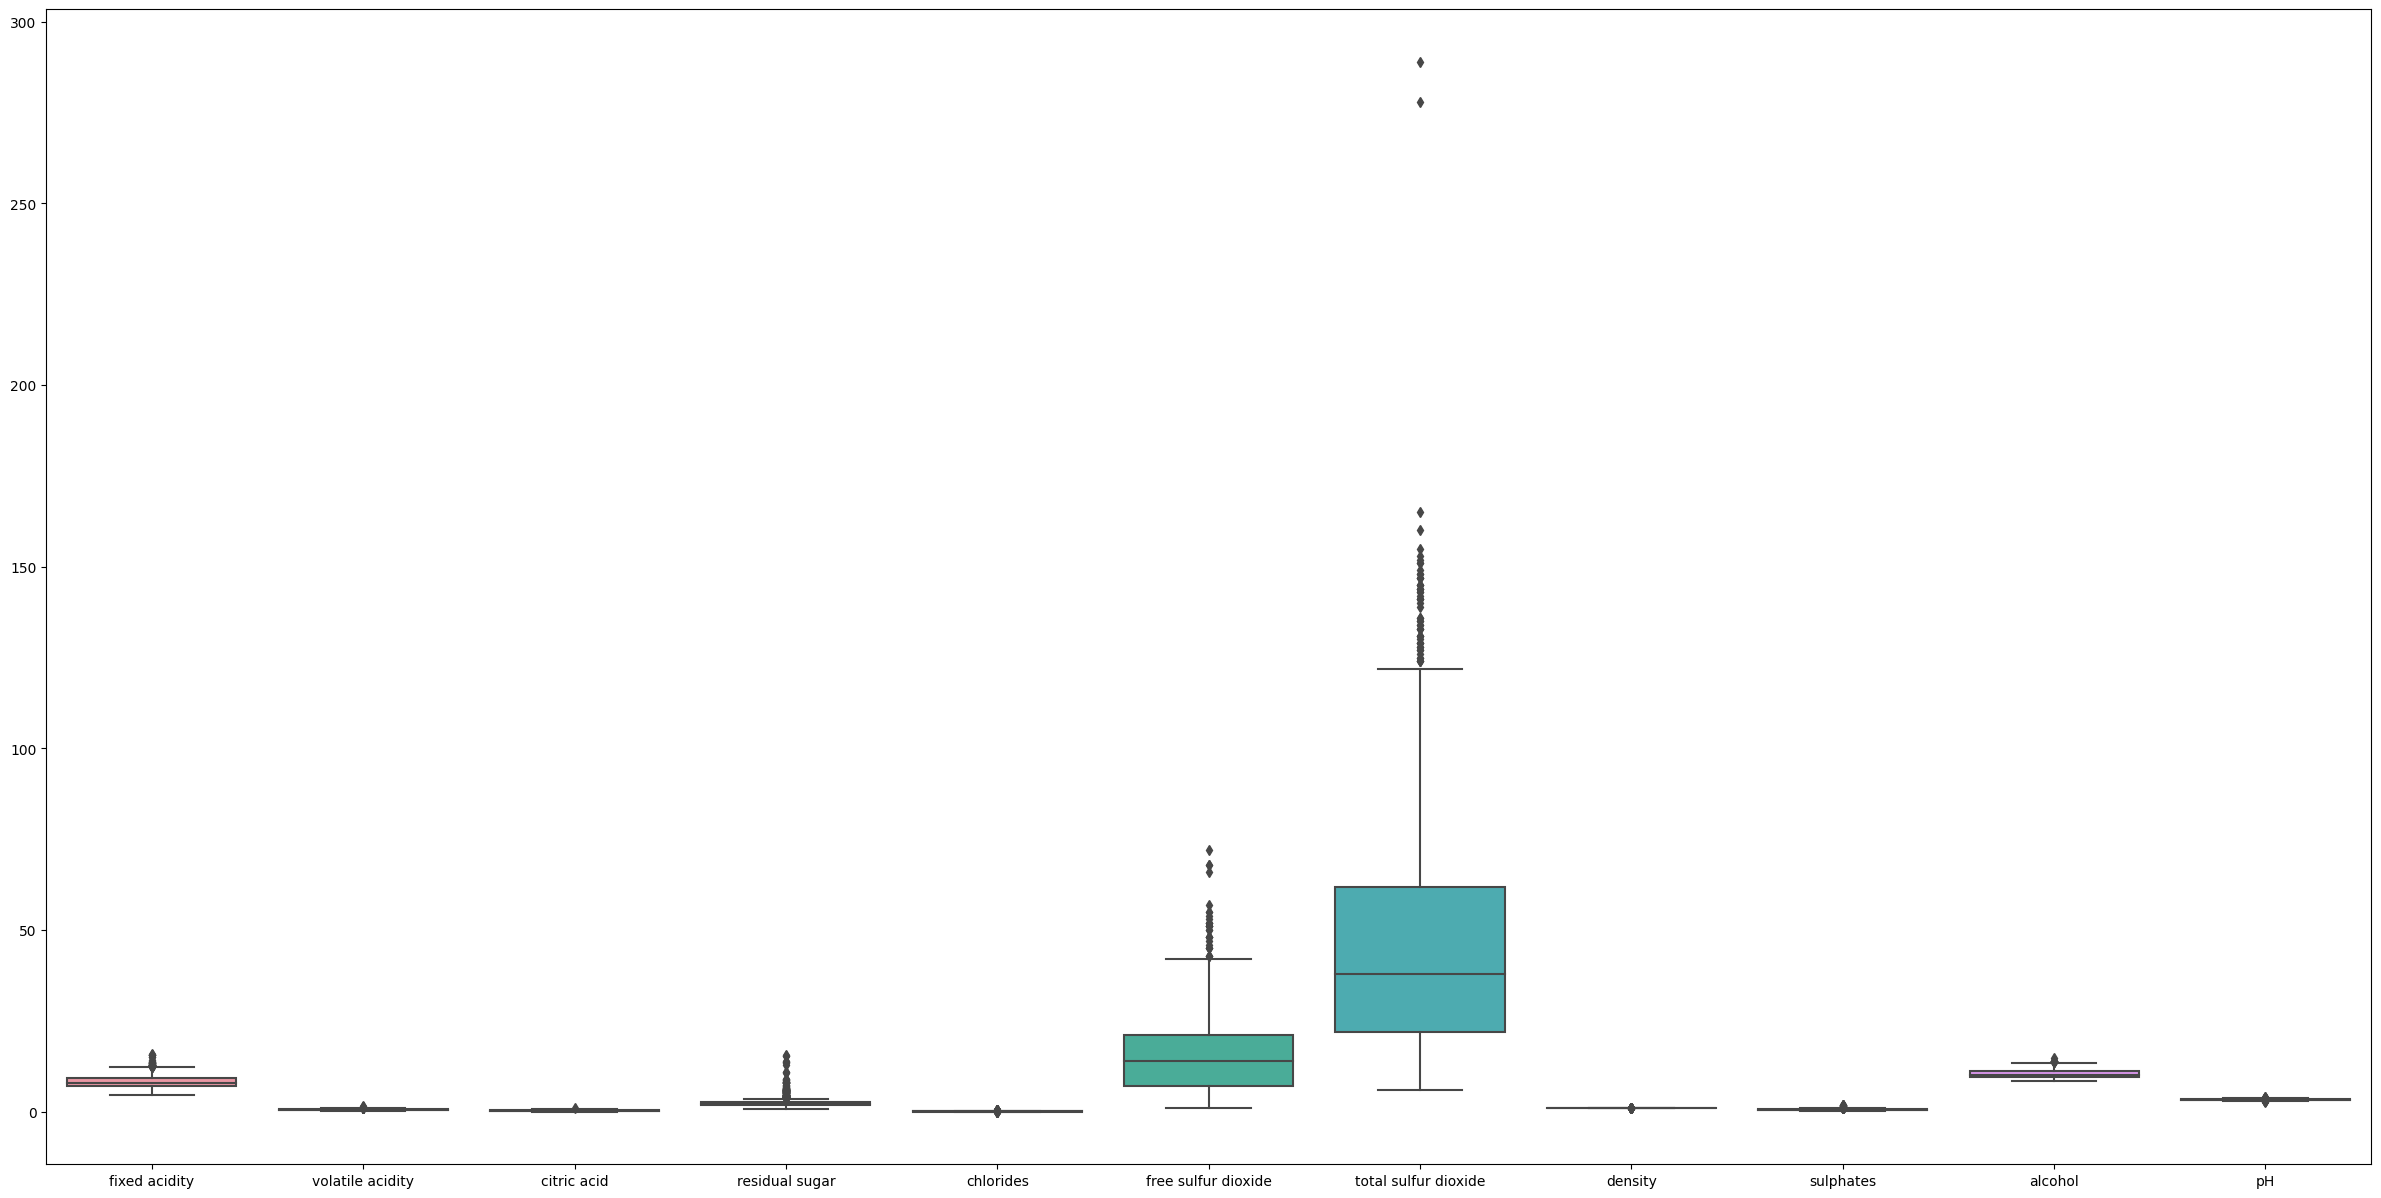

In [ ]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)



# we can see many outliers in free sulfur dioxide, total sulfur dioxide

## Multivariate Analysis

<Figure size 3000x1500 with 0 Axes>

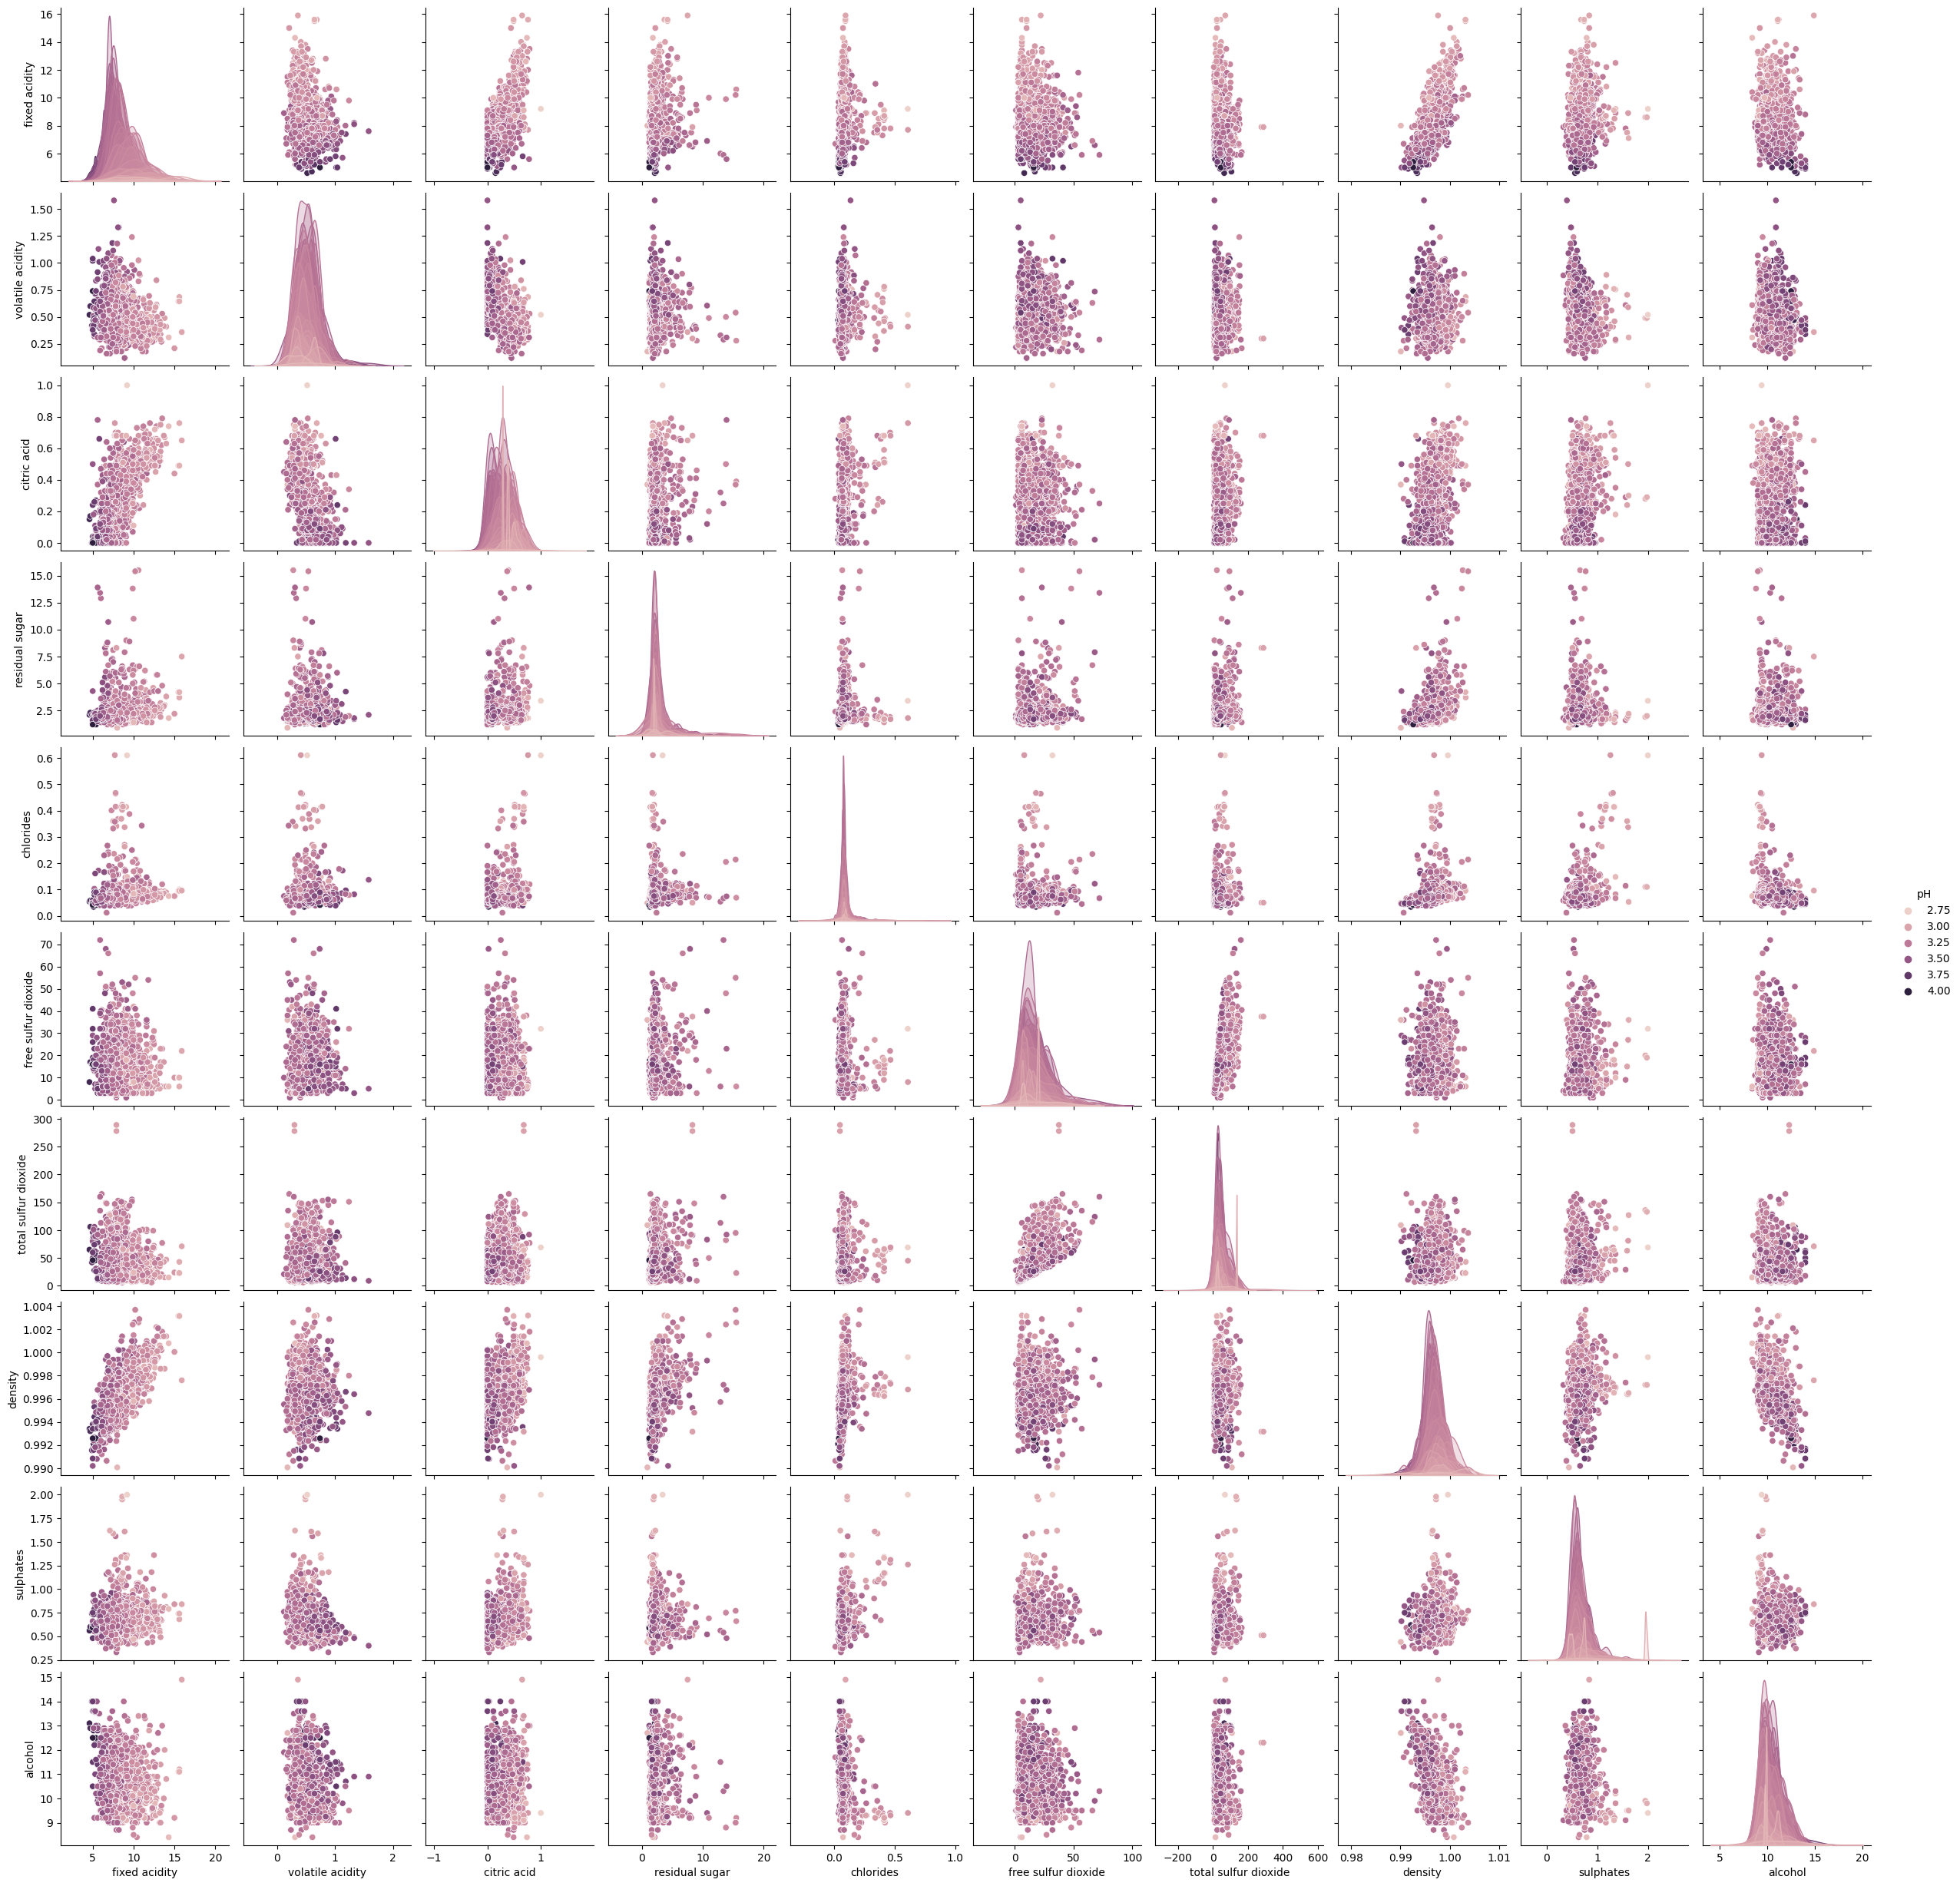

In [ ]:
plt.figure(figsize=(30, 15))
sns.pairplot(data=df, hue='pH')
plt.show()

## HeatMap

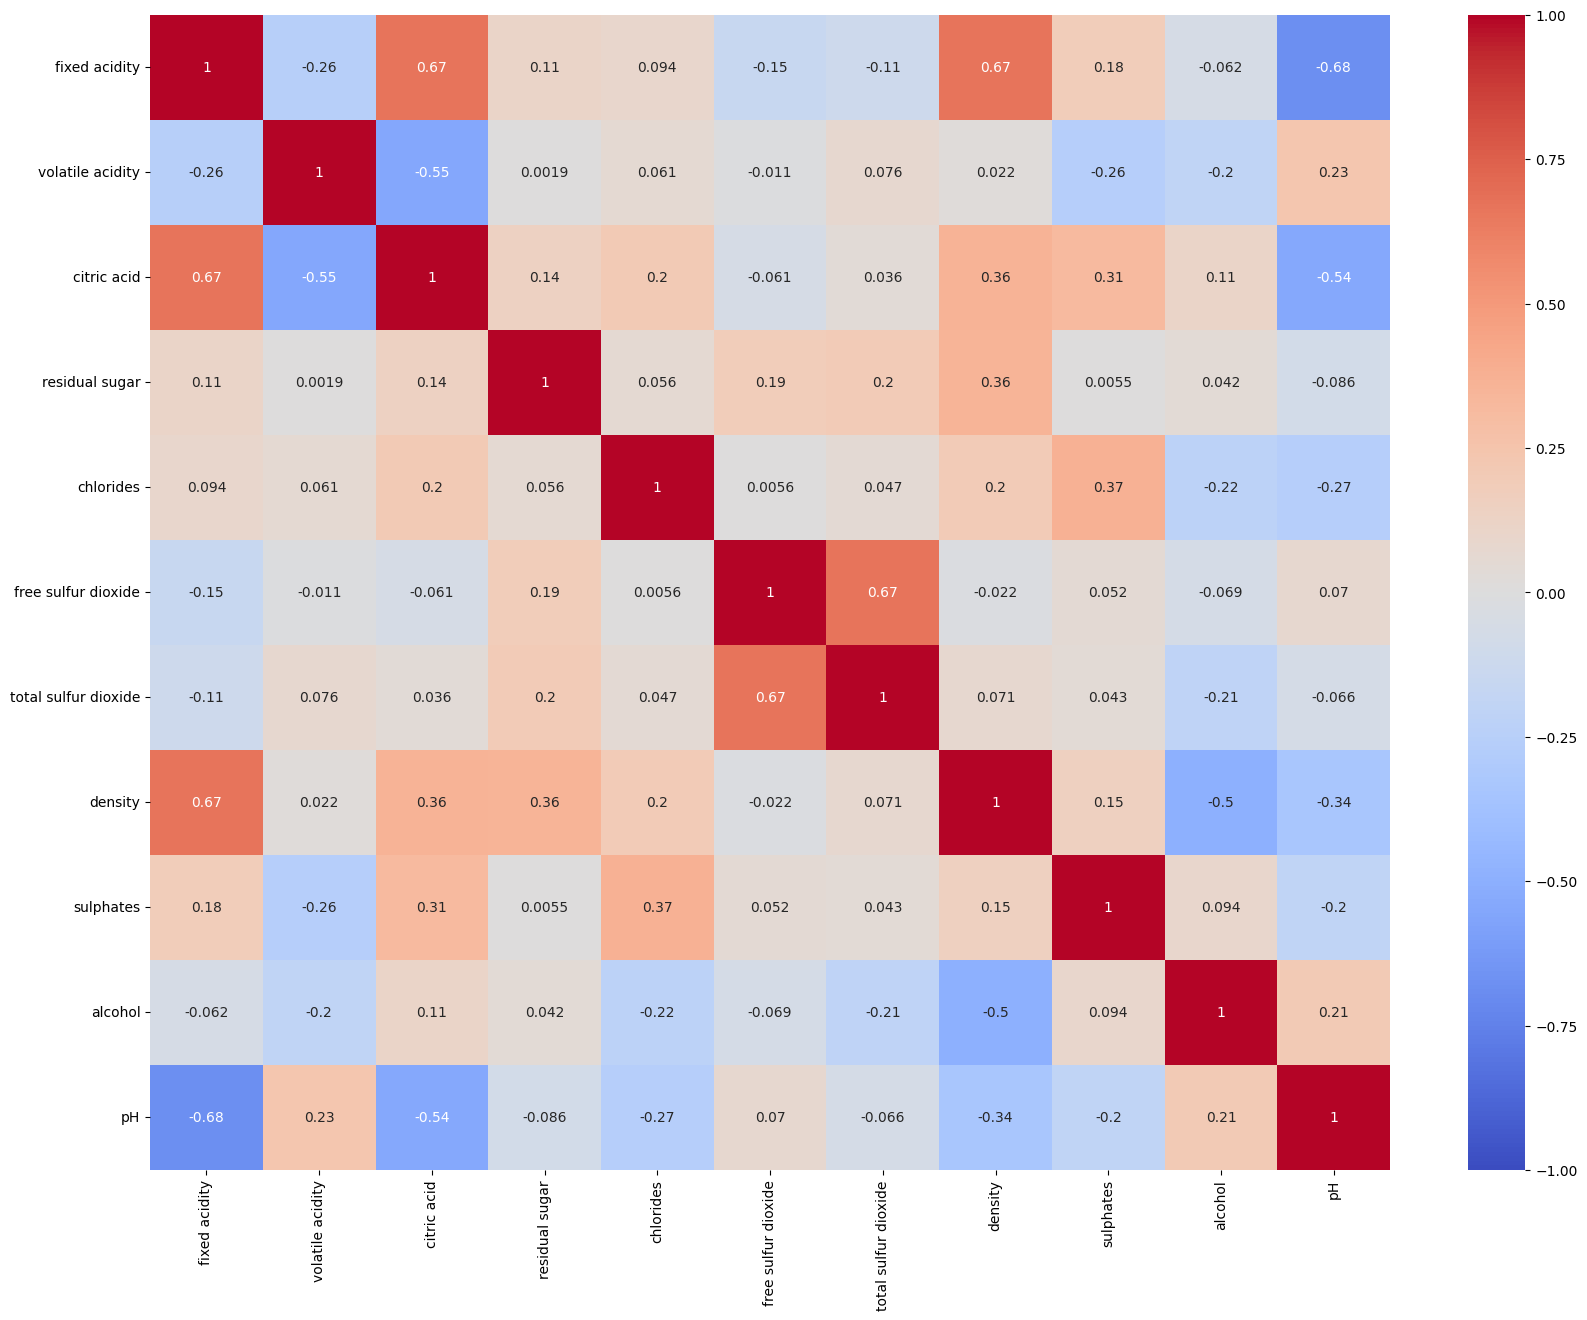

In [ ]:
# Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
# From the above figure following points can be inefered
# Alcohol is having positive correlation with quality variable
# pH has a negative correlation with density, fixed acidity, citric acid, and sulfates.

<ipython-input-16-1c64a8725dad>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, label='Wine-Quality Red Data')
<ipython-input-16-1c64a8725dad>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, label='Wine-Quality Red Data')
<ipython-input-16-1c64a8725dad>:4:

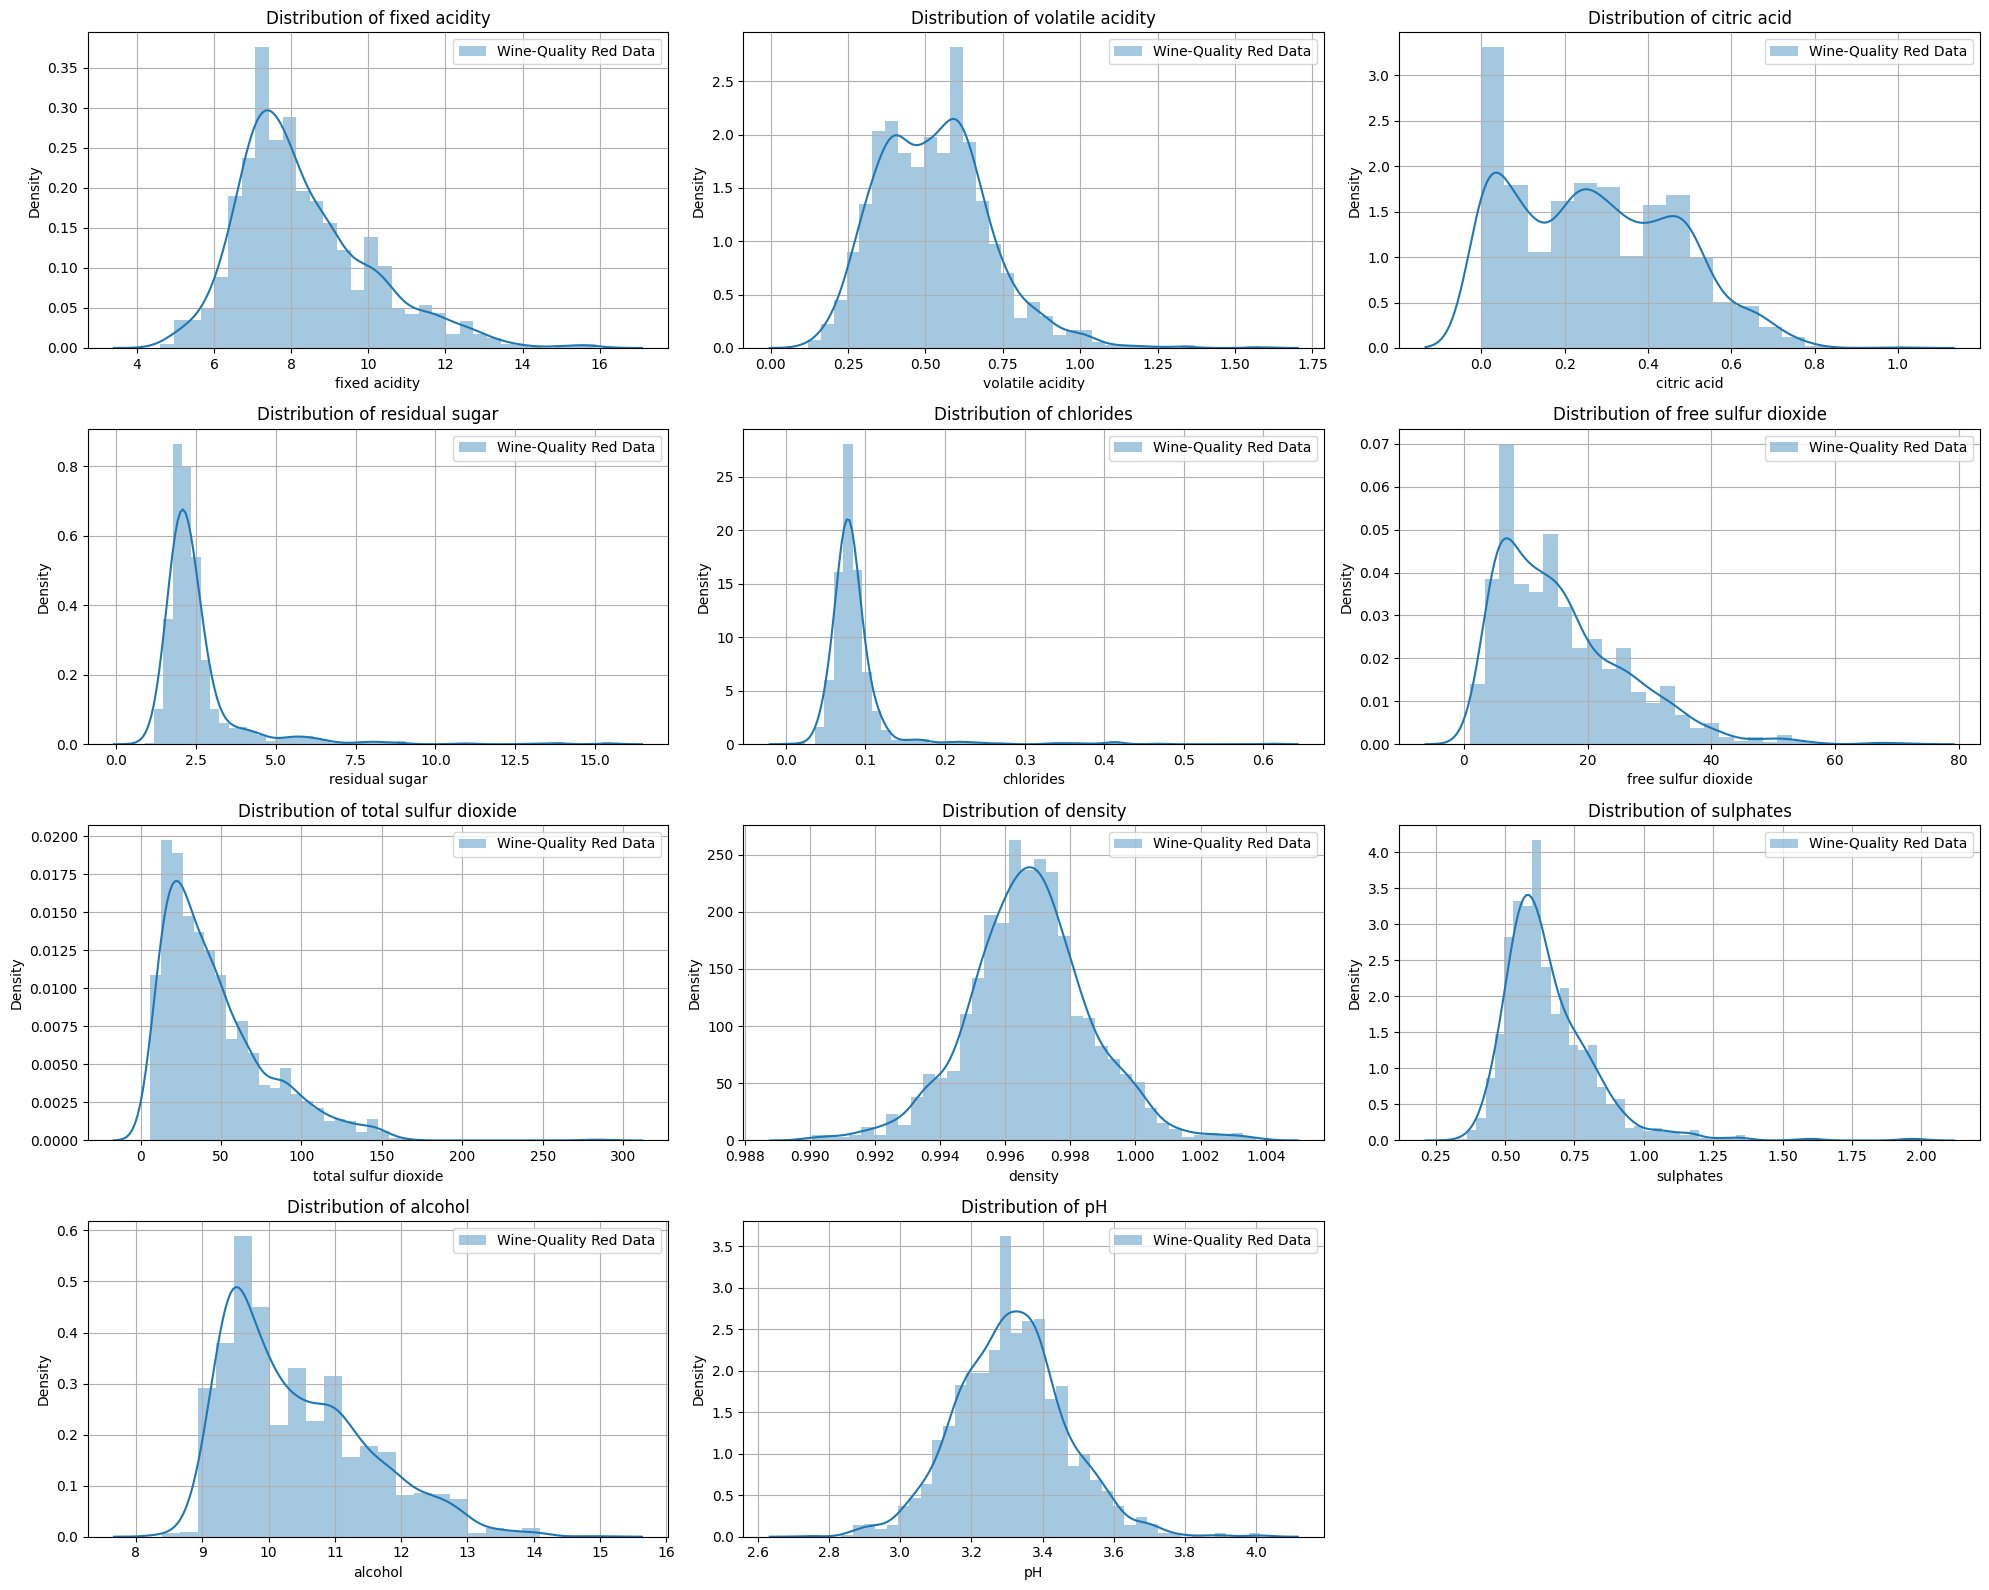

In [ ]:
plt.figure(figsize=(20, 16))
for i, col in enumerate(list(df.columns)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df[col], kde=True, label='Wine-Quality Red Data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.title(f'Distribution of {col}')

plt.tight_layout()  # Adjusted the layout
plt.show()

## From the above figure we can tell Density and Ph are Normally distributed
## From the above figure Chloride Distribution is Skewed right

<function matplotlib.pyplot.show(close=None, block=None)>

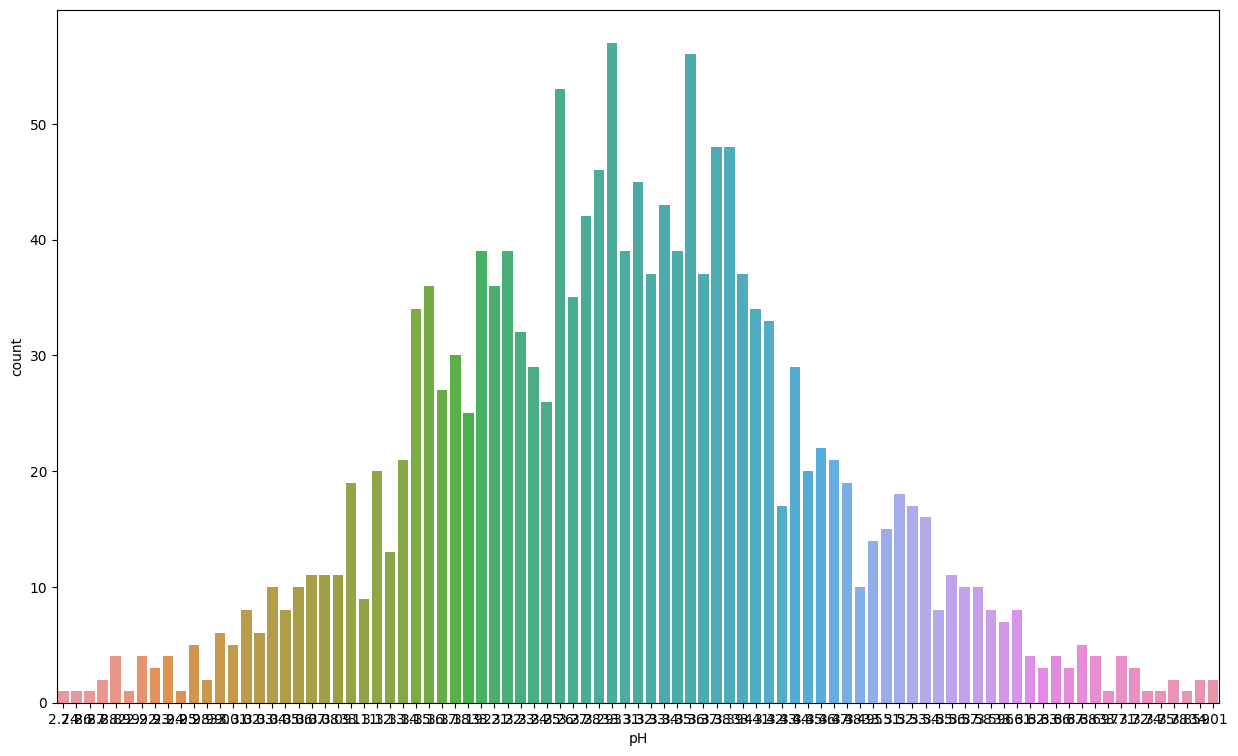

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=df,x='pH')
plt.show

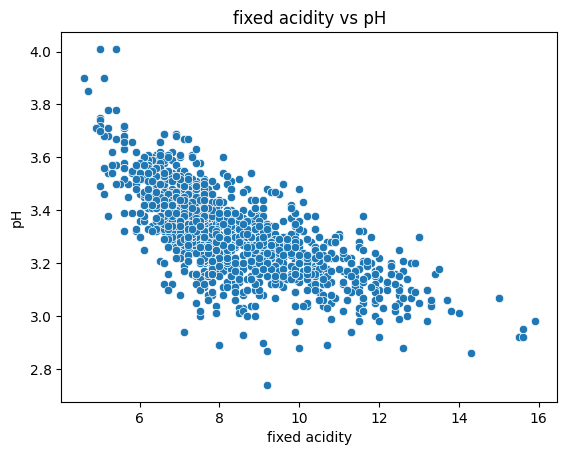

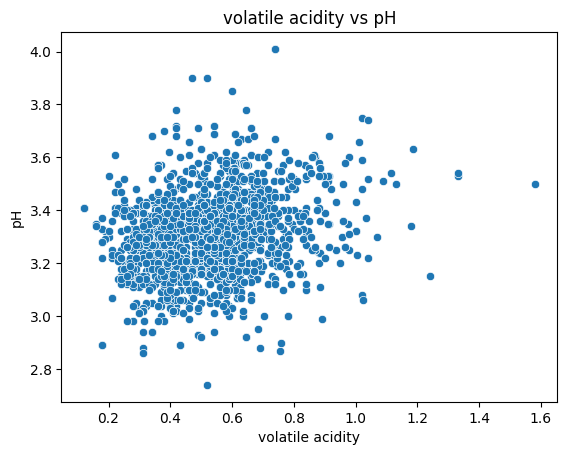

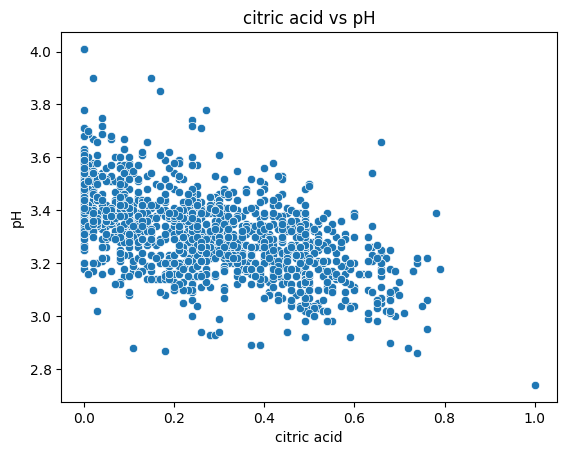

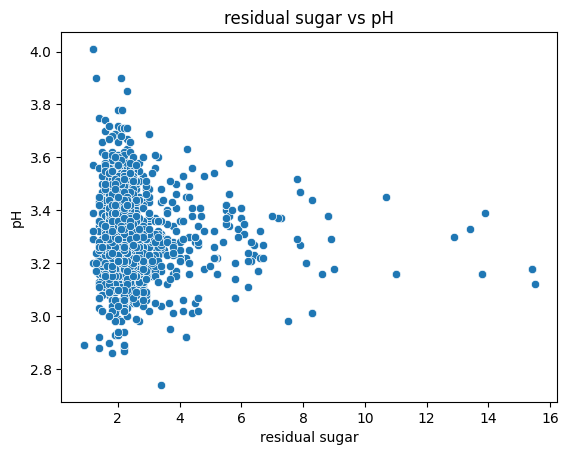

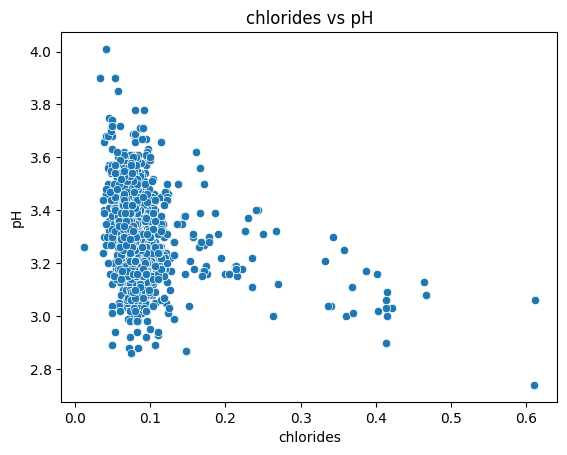

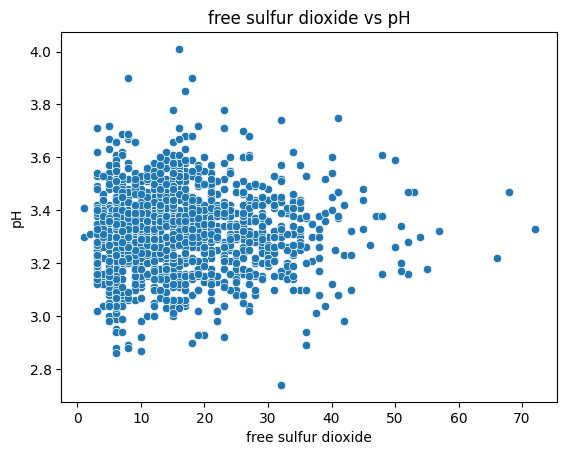

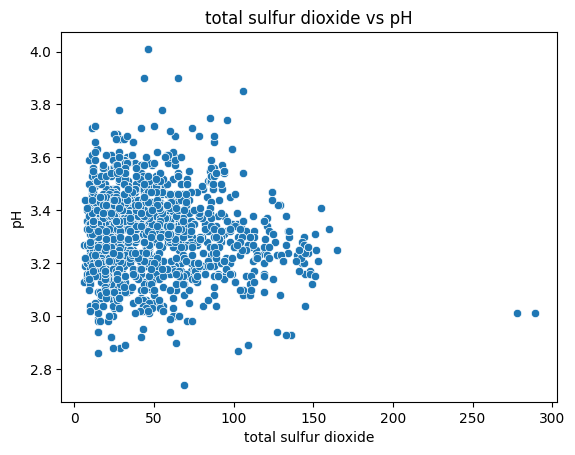

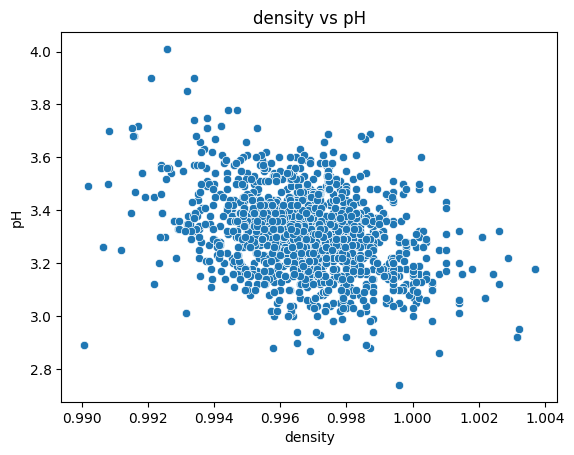

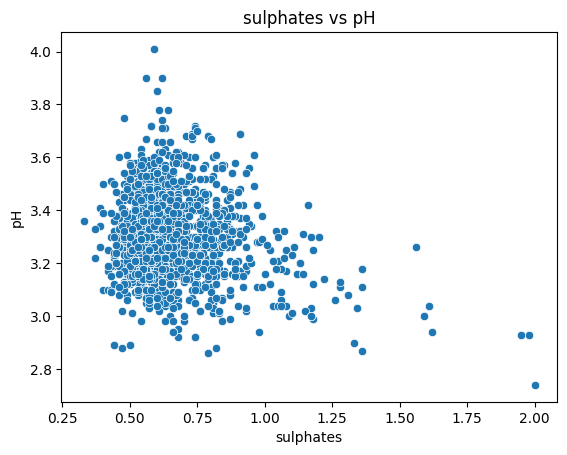

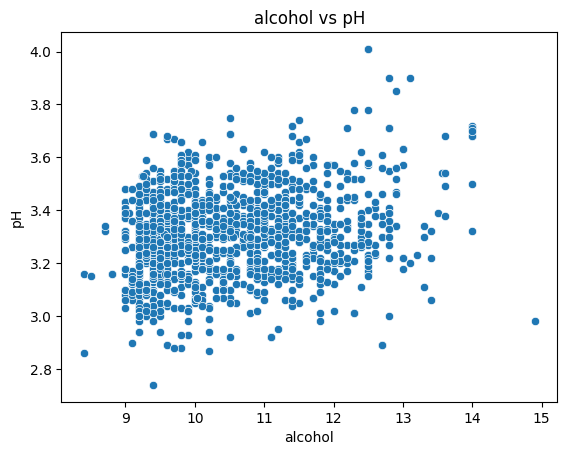

In [ ]:
# Individual Scatter Plots
for feature in df.columns[:-1]:  # Exclude 'Quality'
    sns.scatterplot(x=df[feature], y=df['pH'])
    plt.title(f'{feature} vs pH')
    plt.show()

## From the above figure there might not be a clear linear relationship between the independent variable (x-axis) and the dependent variable (y-axis).

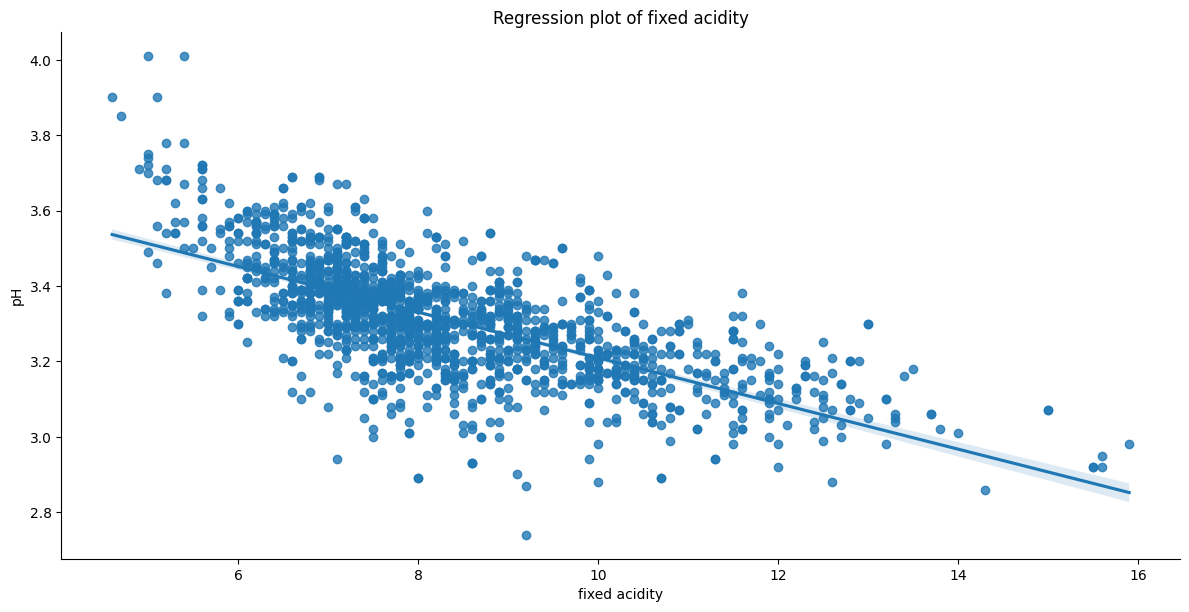

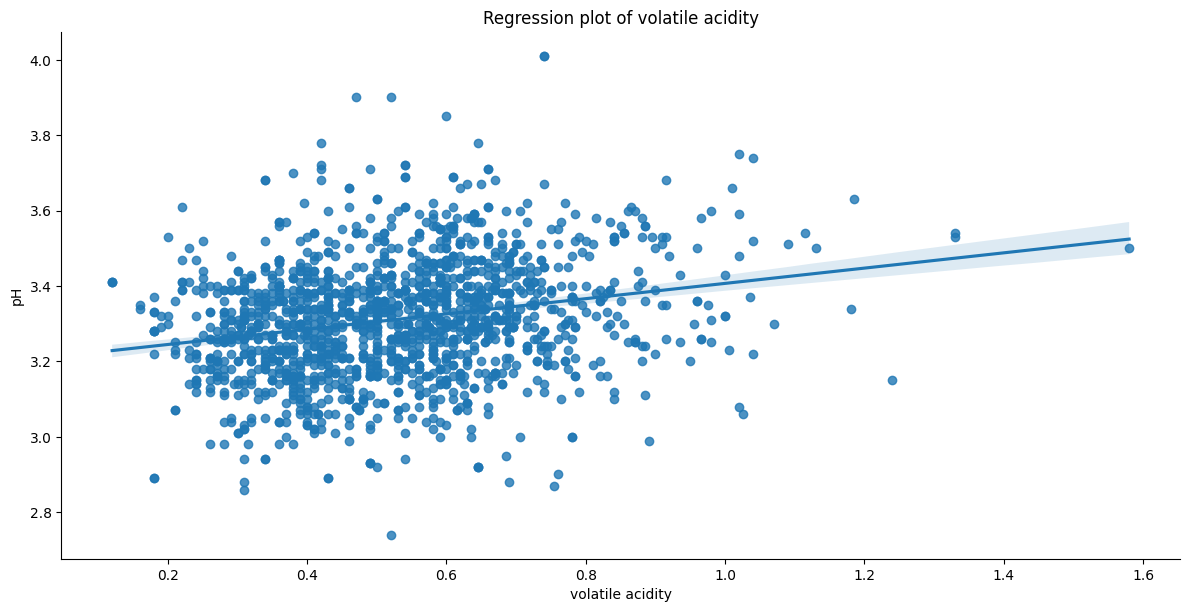

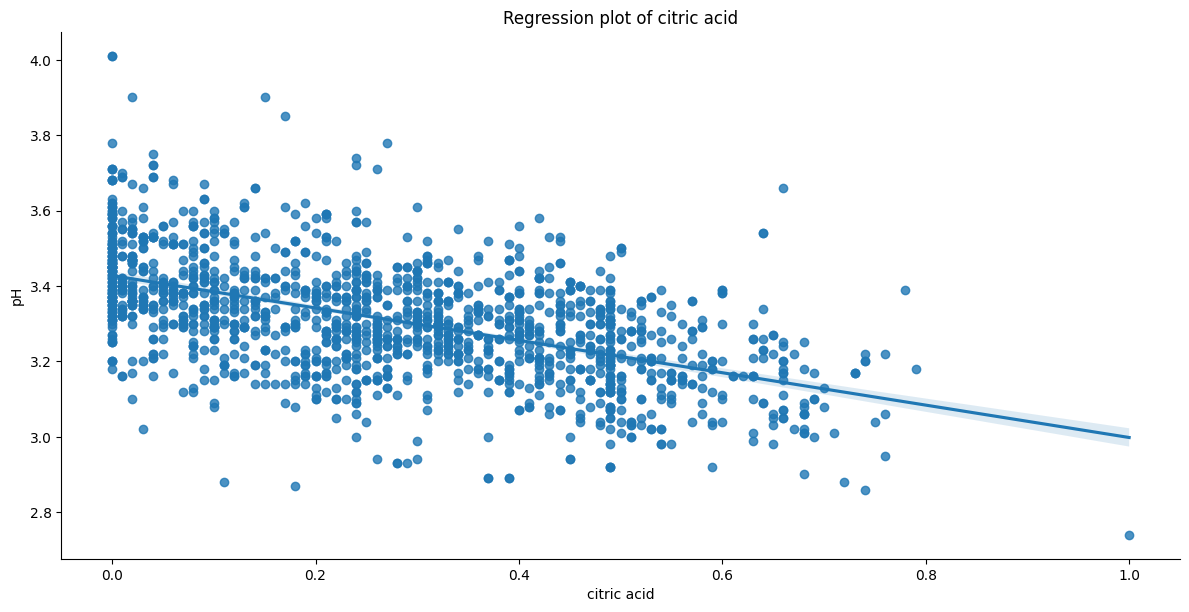

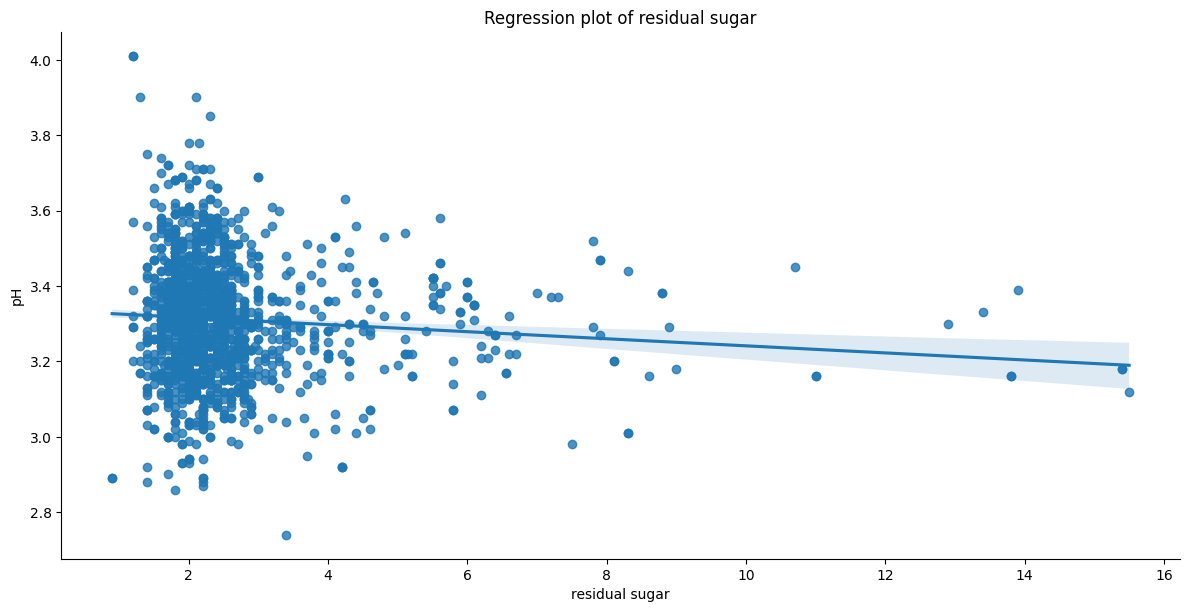

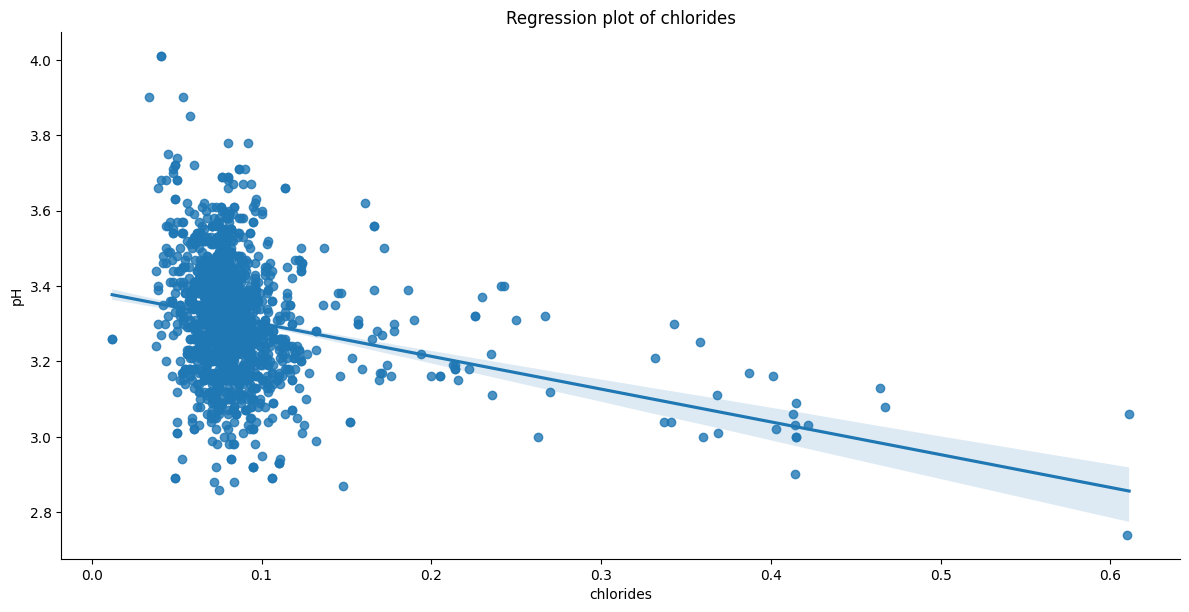

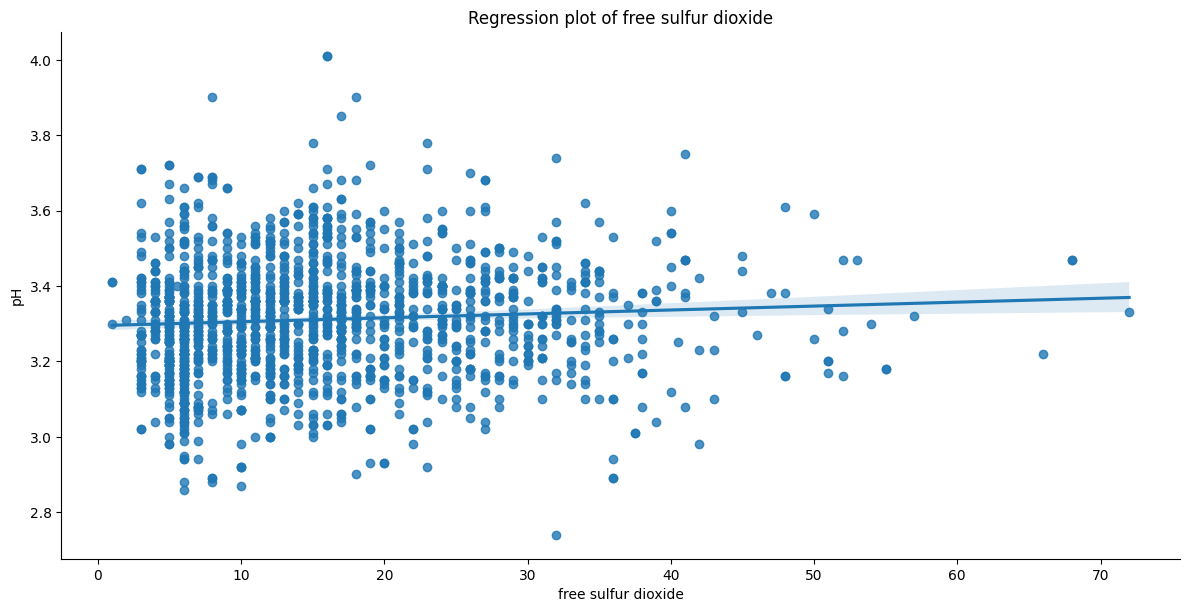

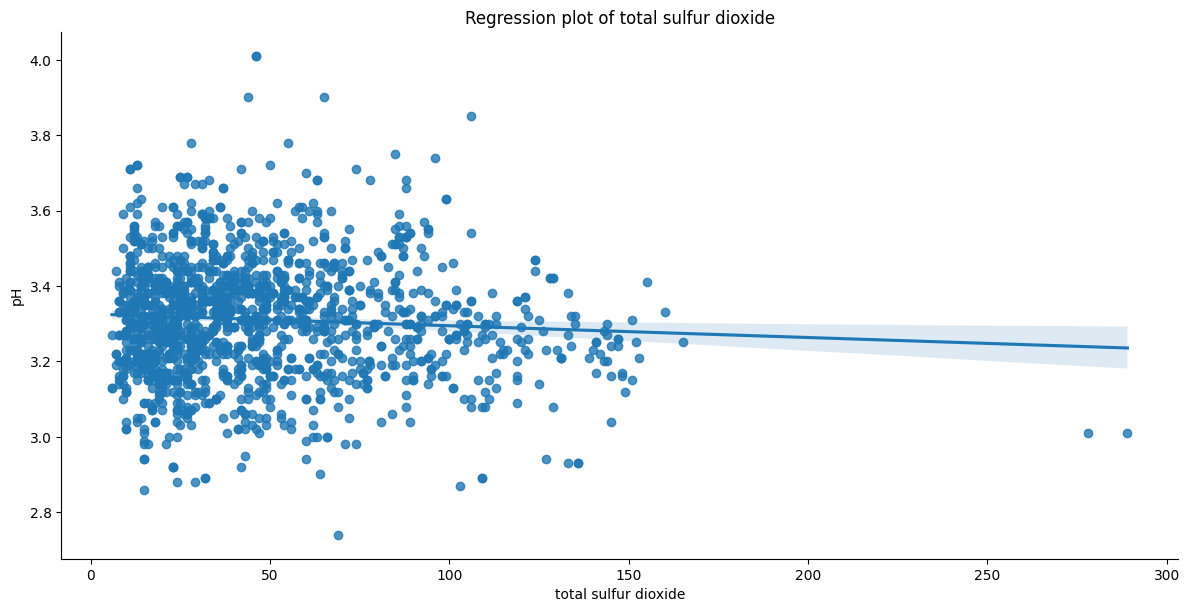

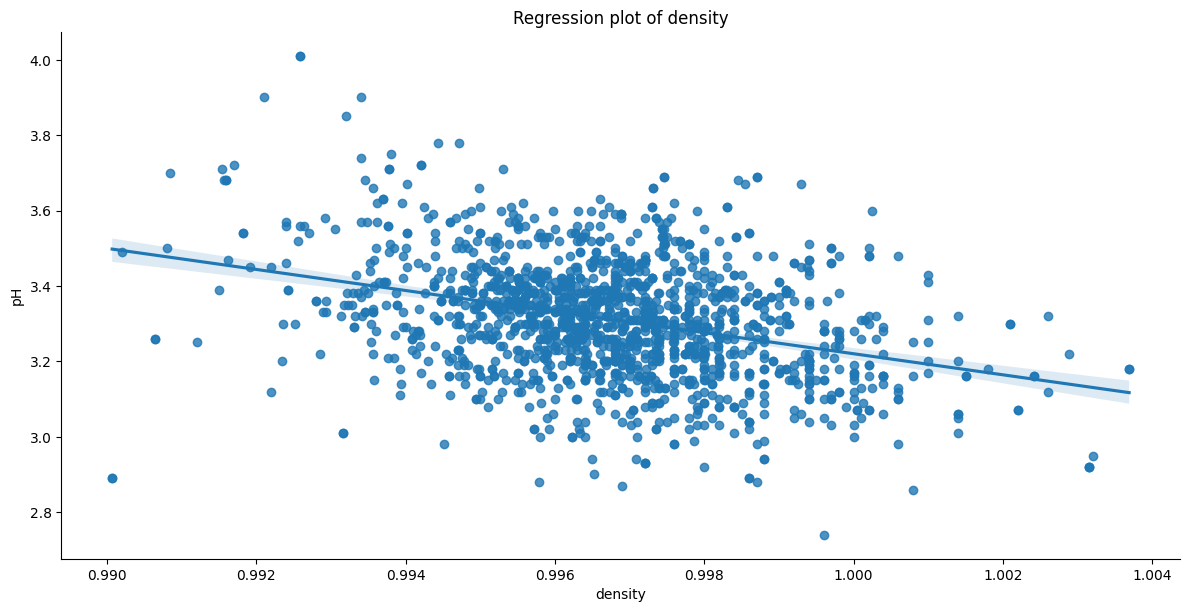

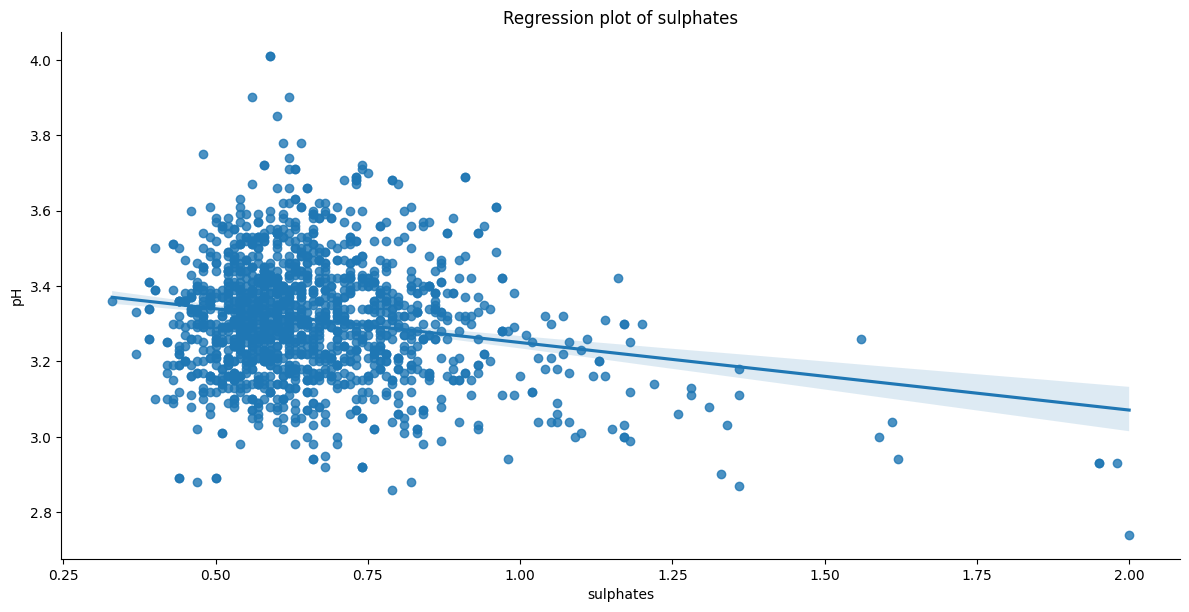

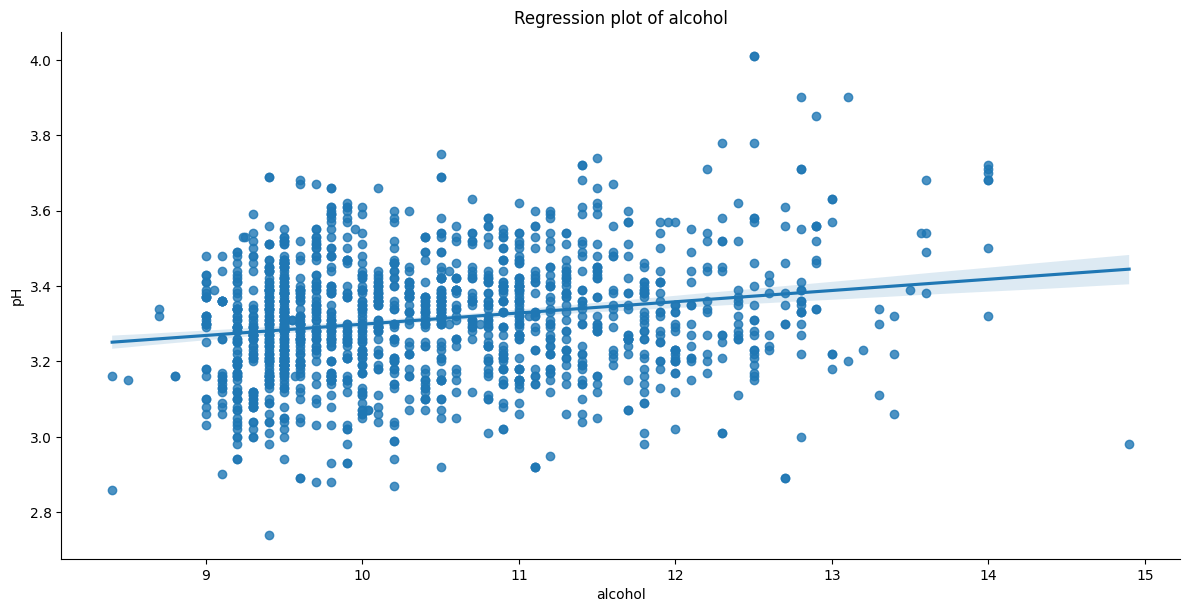

In [ ]:
# Regression Line Plot
for feature in df.columns[:-1]:
    sns.lmplot(x=feature, y='pH', data=df, aspect=2, height=6)
    plt.title(f'Regression plot of {feature}')
    plt.show()

## We are assuming the 'pH' as the output variable as it is a continous Data Type

## Developing the Model

In [ ]:
class LinearRegression:
    def __init__(self):
        pass
    def fit(self,x,y):
        self.w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
        return self.w
    def predict(self,x):
        return np.dot(x,self.w)
    def mean_sq_error(self,y_true,y_pred):
        N=len(y_true)
        return np.sum((y_true - y_pred) ** 2) / N
    def plot_predict(self,y_true,y_pred):
        sns.regplot(x=y_true, y=y_pred, scatter_kws={'alpha':0.5})
        plt.scatter(y_true, y_pred)
        plt.xlabel('Actual Values')
        plt.ylabel('Predictions')
        plt.title('Actual vs. Predicted')
        plt.show()

## Splitting The Data

In [ ]:
split_ratio = 0.8
split_index = int(split_ratio * len(df))
train_data = df[:split_index]
test_data = df[split_index:]

In [ ]:
train_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1274            7.8             0.580         0.13             2.1      0.102   
1275            8.0             0.715         0.22             2.3      0.075   
1276            8.5             0.400         0.40             6.3      0.050   
1277            7.0             0.690         0.00             1.9      0.114   
1278            8.0             0.715         0.22             2.3      0.075   

      free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                    11.0                  34.0  0.99780       0.56      9.4   
1                    25.0                  67.0  0.99680       0.68      9.8   
2                    15.0                  54.0  0.99700       0.65      9.8   
3                    17.0                  60.0  0.99800       0.58      9.8   
4                    11.0                  34.0  0.99780       0.56      9.4   
...                   ...                   ...      ...        ...      ...   
1274                 17.0                  36.0  0.99440       0.53     11.2   
1275                 13.0                  81.0  0.99688       0.54      9.5   
1276                  3.0                  10.0  0.99566       0.56     12.0   
1277                  3.0                  10.0  0.99636       0.60      9.7   
1278                 13.0                  81.0  0.99688       0.54      9.5   

        pH  
0     3.51  
1     3.20  
2     3.26  
3     3.16  
4     3.51  
...    ...  
1274  3.24  
1275  3.24  
1276  3.28  
1277  3.35  
1278  3.24  

[1279 rows x 11 columns]

In [ ]:
print(train_data.shape)


(1279, 11)


In [ ]:
test_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1279            9.8             0.300         0.39             1.7      0.062   
1280            7.1             0.460         0.20             1.9      0.077   
1281            7.1             0.460         0.20             1.9      0.077   
1282            7.9             0.765         0.00             2.0      0.084   
1283            8.7             0.630         0.28             2.7      0.096   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
1279                  3.0                   9.0  0.99480       0.57     11.5   
1280                 28.0                  54.0  0.99560       0.64     10.4   
1281                 28.0                  54.0  0.99560       0.64     10.4   
1282                  9.0                  22.0  0.99619       0.68     10.9   
1283                 17.0                  69.0  0.99734       0.63     10.2   
...                   ...                   ...      ...        ...      ...   
1594                 32.0                  44.0  0.99490       0.58     10.5   
1595                 39.0                  51.0  0.99512       0.76     11.2   
1596                 29.0                  40.0  0.99574       0.75     11.0   
1597                 32.0                  44.0  0.99547       0.71     10.2   
1598                 18.0                  42.0  0.99549       0.66     11.0   

        pH  
1279  3.14  
1280  3.37  
1281  3.37  
1282  3.33  
1283  3.26  
...    ...  
1594  3.45  
1595  3.52  
1596  3.42  
1597  3.57  
1598  3.39  

[320 rows x 11 columns]

In [ ]:
print(test_data.shape)


(320, 11)


In [ ]:
# Extract features and labels
X_train = train_data.drop('pH', axis=1).values
y_train = train_data['pH'].values

X_test = test_data.drop('pH', axis=1).values
y_test = test_data['pH'].values

In [ ]:
print("X_train:")
print(X_train)

print("\ny_train:")
print(y_train)

print("\nX_test:")
print(X_test)

print("\ny_test:")
print(y_test)

print("\nShapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train:
[[ 7.4      0.7      0.      ...  0.9978   0.56     9.4    ]
 [ 7.8      0.88     0.      ...  0.9968   0.68     9.8    ]
 [ 7.8      0.76     0.04    ...  0.997    0.65     9.8    ]
 ...
 [ 8.5      0.4      0.4     ...  0.99566  0.56    12.     ]
 [ 7.       0.69     0.      ...  0.99636  0.6      9.7    ]
 [ 8.       0.715    0.22    ...  0.99688  0.54     9.5    ]]

y_train:
[3.51 3.2  3.26 ... 3.28 3.35 3.24]

X_test:
[[ 9.8      0.3      0.39    ...  0.9948   0.57    11.5    ]
 [ 7.1      0.46     0.2     ...  0.9956   0.64    10.4    ]
 [ 7.1      0.46     0.2     ...  0.9956   0.64    10.4    ]
 ...
 [ 6.3      0.51     0.13    ...  0.99574  0.75    11.     ]
 [ 5.9      0.645    0.12    ...  0.99547  0.71    10.2    ]
 [ 6.       0.31     0.47    ...  0.99549  0.66    11.     ]]

y_test:
[3.14 3.37 3.37 3.33 3.26 3.39 3.15 3.35 3.22 3.3  3.3  3.36 3.29 3.62
 3.34 3.29 3.2  3.2  3.35 3.45 3.5  3.78 3.6  3.3  3.36 3.12 3.3  3.29
 3.41 3.29 3.28 3.3  3.33 3.34 3.4  3.4  

In [ ]:
lr=LinearRegression()

In [ ]:
w = lr.fit(X_train, y_train)

In [ ]:
print(w)

[-5.71088743e-02  8.17063892e-02 -3.86110936e-02 -3.99159746e-04
 -5.61350861e-01  1.88259856e-03 -8.95262295e-04  3.65038955e+00
 -2.69450961e-03  1.77469281e-02]


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([3.24585606, 3.40194729, 3.40194729, 3.38873192, 3.27908101,
       3.41129591, 3.1354165 , 3.40015823, 3.41001031, 3.36199973,
       3.36199973, 3.39662487, 3.35985783, 3.50456428, 3.3952535 ,
       3.35985783, 3.44890225, 3.44890225, 3.43099721, 3.52803468,
       3.4423062 , 3.56342618, 3.45598398, 3.28704371, 3.32382625,
       3.34736237, 3.34486557, 3.21991441, 3.45489624, 3.21991441,
       3.39846471, 3.34486557, 3.47600878, 3.39211637, 3.3638533 ,
       3.36771666, 3.32460747, 3.56107044, 3.22947538, 3.32460747,
       3.05526226, 3.19725402, 3.58391399, 3.28845277, 3.27552262,
       3.42314234, 3.42314234, 3.42314234, 3.42314234, 3.41339722,
       3.32826725, 3.32826725, 3.35269561, 3.30050497, 3.2801559 ,
       3.37288905, 3.47981218, 3.46822897, 3.46822897, 3.46822897,
       3.37988255, 3.37988255, 3.37988255, 3.38375973, 3.37988255,
       3.15070011, 3.33171997, 3.49687877, 3.40196504, 3.40196504,
       3.43182351, 3.29289684, 3.4096053 , 3.36443392, 3.36443

In [ ]:
mse=lr.mean_sq_error(y_test,y_pred)

In [ ]:
print(mse)

0.00950779346516177


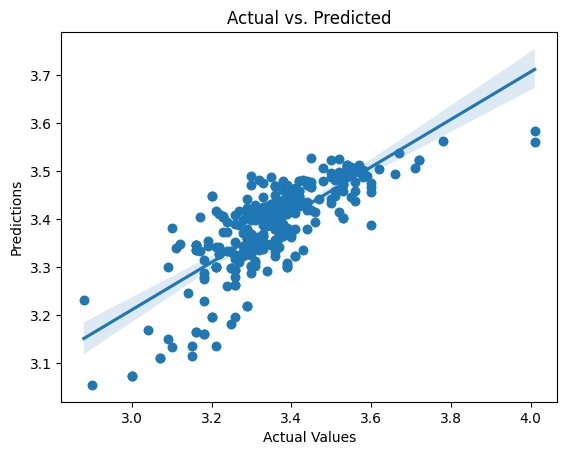

In [ ]:
lr.plot_predict(y_test, y_pred)

## Logistic Regression on the penguins Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('penguins.csv')

In [9]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

In [10]:
df = df.drop(columns=['year'])


In [11]:
df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
df.isnull().sum() #11Null values

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [14]:
# Find out each row with null values

df[df.isnull().any(axis=1)]


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
178  Gentoo     Biscoe            44.5           14.3              216.0   
218  Gentoo     Biscoe            46.2           14.4              214.0   
256  Gentoo     Biscoe            47.3           13.8              216.0   
268  Gentoo     Biscoe            44.5           15.7              217.0   
271  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
178       4100.0  NaN  
218       4650.0  NaN  
256       4725.0  NaN  
268       4875.0  NaN  
271          NaN  NaN

In [15]:
# Dropping the 2 rows with null values for all variables

df.drop(df[df['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [16]:
df[df.isnull().any(axis=1)]


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
178  Gentoo     Biscoe            44.5           14.3              216.0   
218  Gentoo     Biscoe            46.2           14.4              214.0   
256  Gentoo     Biscoe            47.3           13.8              216.0   
268  Gentoo     Biscoe            44.5           15.7              217.0   

     body_mass_g  sex  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
178       4100.0  NaN  
218       4650.0  NaN  
256       4725.0  NaN  
268       4875.0  NaN

In [17]:
sex_mode = df['sex'].mode()[0]

print(f"The mode of the 'sex' variable is: {sex_mode}")

The mode of the 'sex' variable is: male


In [19]:
#imputing the null values in sex with its mode
df['sex'] = df['sex'].fillna('male')

In [20]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  
0         3750.0    male  
1         3800.0  female  
2         3250.0  female  
4         3450.0  female  
5         3650.0    male  
..           ...     ...  
339       4000.0    male  
340       3400.0  female  
341       3775.0    male  
342       4100.0    male  
343       3775.0  female  

[342 rows x 7 columns]

In [21]:
print("Rows with Missing Values:")
print(df[df.isnull().any(axis=1)])

Rows with Missing Values:
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


In [22]:
df.isnull().sum() #checking null values

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

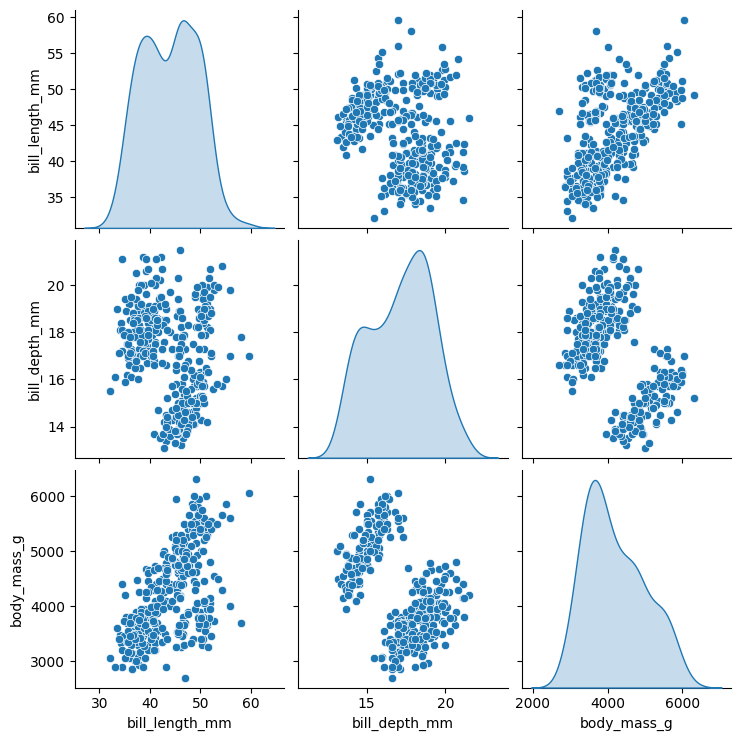

In [23]:
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']], diag_kind='kde')
plt.show()

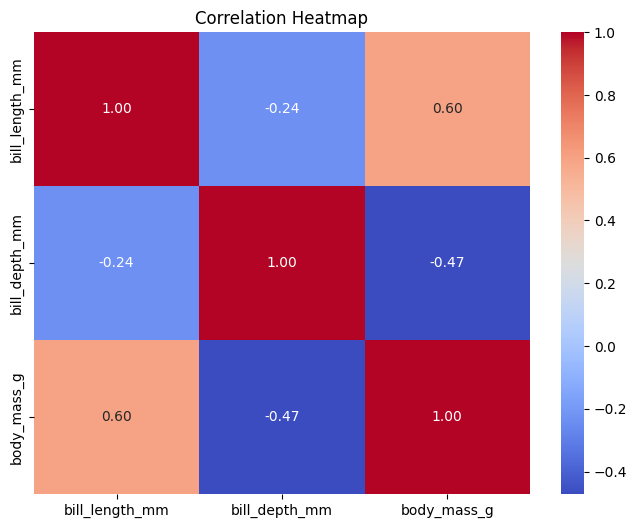

In [24]:
# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

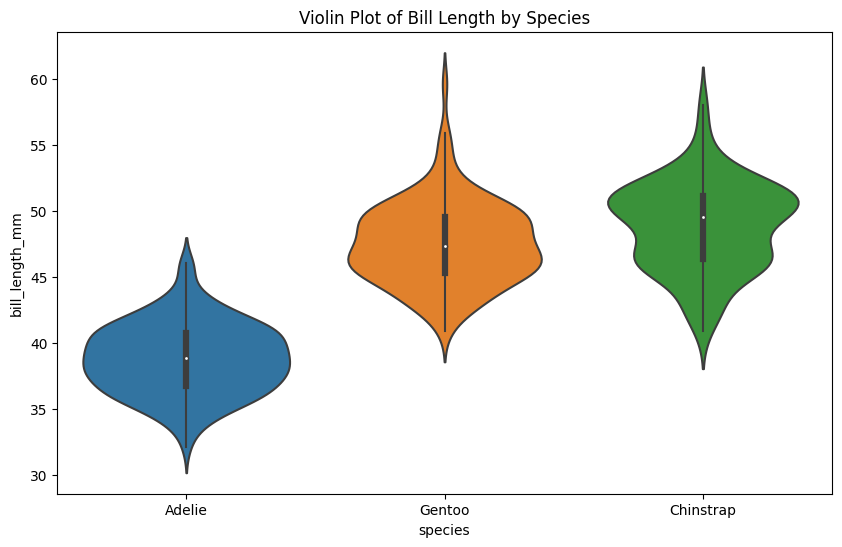

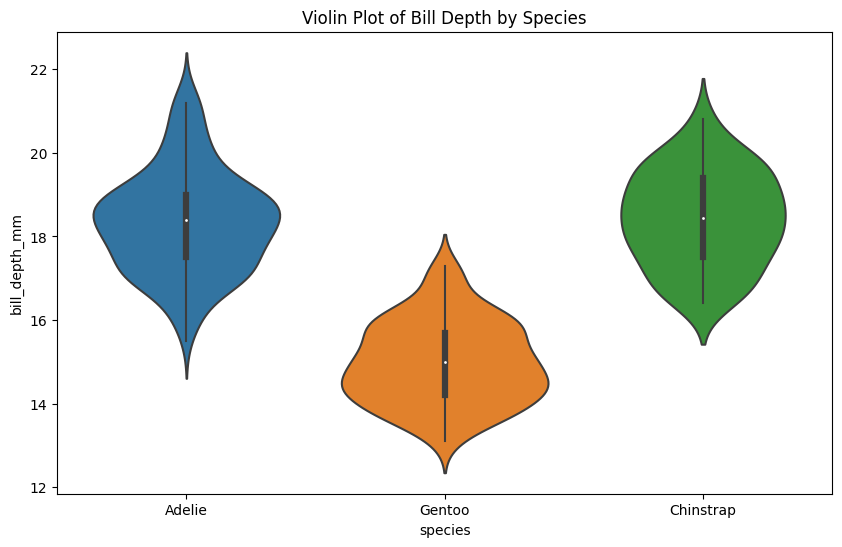

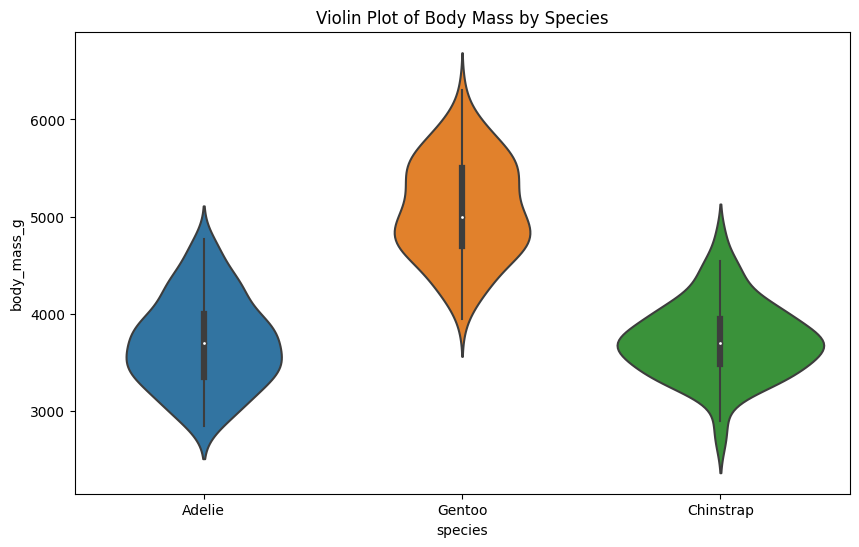

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='bill_length_mm', data=df)
plt.title('Violin Plot of Bill Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='bill_depth_mm', data=df)
plt.title('Violin Plot of Bill Depth by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='body_mass_g', data=df)
plt.title('Violin Plot of Body Mass by Species')
plt.show()

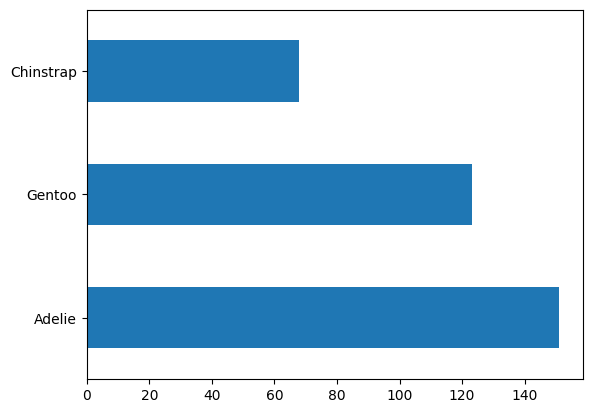

In [26]:
df['species'].value_counts().plot(kind='barh') #Number of entries in data for each species
plt.show()

In [27]:
print(df.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [28]:
# Convert 'species', 'island', and 'sex' to categorical
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [29]:
# Check the data types after conversion
print(df.dtypes)

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object


In [30]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  
0         3750.0    male  
1         3800.0  female  
2         3250.0  female  
4         3450.0  female  
5         3650.0    male  
..           ...     ...  
339       4000.0    male  
340       3400.0  female  
341       3775.0    male  
342       4100.0    male  
343       3775.0  female  

[342 rows x 7 columns]

In [31]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
df['island_encoded'] = le.fit_transform(df['island'])


In [32]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  species_encoded  island_encoded  
0         3750.0    male                0               2  
1         3800.0  female                0               2  
2         3250.0  female                0               2  
4         3450.0  female                0               2  
5         3650.0    male                0               2  
..           ...     ...              ...             ...  
339       4000.0    male                1               1  
340       3400.0  female                1               1  
341       3775.0    male                1               1  
342       4100.0    male                1               1  
343       3775.0  female                1               1  

[342 rows x 9 columns]

In [33]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


In [34]:
df = df.drop(columns=['species', 'island'])

In [35]:
df

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g sex  \
0              39.1           18.7              181.0       3750.0   0   
1              39.5           17.4              186.0       3800.0   1   
2              40.3           18.0              195.0       3250.0   1   
4              36.7           19.3              193.0       3450.0   1   
5              39.3           20.6              190.0       3650.0   0   
..              ...            ...                ...          ...  ..   
339            55.8           19.8              207.0       4000.0   0   
340            43.5           18.1              202.0       3400.0   1   
341            49.6           18.2              193.0       3775.0   0   
342            50.8           19.0              210.0       4100.0   0   
343            50.2           18.7              198.0       3775.0   1   

     species_encoded  island_encoded  
0                  0               2  
1                  0               2  
2                  0               2  
4                  0               2  
5                  0               2  
..               ...             ...  
339                1               1  
340                1               1  
341                1               1  
342                1               1  
343                1               1  

[342 rows x 7 columns]

In [36]:
# Get the 'sex' column
sex_column = df.pop('sex')



In [37]:
df['sex'] = sex_column

In [38]:
df

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1           18.7              181.0       3750.0   
1              39.5           17.4              186.0       3800.0   
2              40.3           18.0              195.0       3250.0   
4              36.7           19.3              193.0       3450.0   
5              39.3           20.6              190.0       3650.0   
..              ...            ...                ...          ...   
339            55.8           19.8              207.0       4000.0   
340            43.5           18.1              202.0       3400.0   
341            49.6           18.2              193.0       3775.0   
342            50.8           19.0              210.0       4100.0   
343            50.2           18.7              198.0       3775.0   

     species_encoded  island_encoded sex  
0                  0               2   0  
1                  0               2   1  
2                  0               2   1  
4                  0               2   1  
5                  0               2   0  
..               ...             ...  ..  
339                1               1   0  
340                1               1   1  
341                1               1   0  
342                1               1   0  
343                1               1   1  

[342 rows x 7 columns]

In [39]:
null_counts = df.isnull().sum()


In [40]:
print(null_counts)


bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species_encoded      0
island_encoded       0
sex                  0
dtype: int64


## Model Building

In [41]:
class LogitRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.best_accuracy = 0
        self.accuracies = []
        self.loss_stack=[]
    def cost(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def gradient_descent(self,X,y,y_pred):
        dw=(1/len(y))*np.dot(X.T, (y_pred - y))
        db=(1/len(y))*np.sum(y_pred-y)
        return dw,db
    def fit(self, X, y):
        self.w = np.random.uniform(0, 1, X.shape[1])
        self.b = np.random.uniform(0, 1)
        self.loss = []

        for _ in range(self.iterations):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)

            dw, db = self.gradient_descent(X, y, y_pred)
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            current_loss = self.cost(y, y_pred)
            self.loss.append(current_loss)
            print(f'Iteration: {_}, Loss: {current_loss}')

            y_pred = (y_pred >= 0.5).astype(int)
            accuracy = np.mean(y_pred == y)
            self.accuracies.append(accuracy)
            if(accuracy > self.best_accuracy):
                self.best_accuracy = accuracy
                self.best_w = self.w

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)

    def accuracy(self, Y_pred, Y):
        accuracy = np.mean(Y_pred == Y)
        return accuracy

    def plot(self):
        plt.plot(self.loss)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show()

        plt.plot(self.accuracies)
        plt.xlabel('Iteration')
        plt.ylabel('Accuracy')
        plt.show()

In [42]:
features_to_standardize = df.iloc[:, :-1].values

In [43]:
features_to_standardize

array([[3.910e+01, 1.870e+01, 1.810e+02, 3.750e+03, 0.000e+00, 2.000e+00],
       [3.950e+01, 1.740e+01, 1.860e+02, 3.800e+03, 0.000e+00, 2.000e+00],
       [4.030e+01, 1.800e+01, 1.950e+02, 3.250e+03, 0.000e+00, 2.000e+00],
       ...,
       [4.960e+01, 1.820e+01, 1.930e+02, 3.775e+03, 1.000e+00, 1.000e+00],
       [5.080e+01, 1.900e+01, 2.100e+02, 4.100e+03, 1.000e+00, 1.000e+00],
       [5.020e+01, 1.870e+01, 1.980e+02, 3.775e+03, 1.000e+00, 1.000e+00]])

In [44]:
target_variable = df.iloc[:, -1].values

In [45]:
target_variable

[0, 1, 1, 1, 0, ..., 0, 1, 0, 0, 1]
Length: 342
Categories (2, int64): [1, 0]

In [46]:
# Calculate the mean and standard deviation for each feature
mean = np.mean(features_to_standardize, axis=0)
std_dev = np.std(features_to_standardize, axis=0)

In [47]:
# Standardize the features
features_standardized = (features_to_standardize - mean) / std_dev

In [48]:
# Combine the standardized features with the original target variable
df.iloc[:, :-1] = features_standardized
df.iloc[:, -1] = target_variable  # Restore the original target variable

<ipython-input-48-ba2eb2aa2f38>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, -1] = target_variable  # Restore the original target variable


In [49]:
df

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.884499       0.785449          -1.418347    -0.564142   
1         -0.811126       0.126188          -1.062250    -0.501703   
2         -0.664380       0.430462          -0.421277    -1.188532   
4         -1.324737       1.089724          -0.563715    -0.938776   
5         -0.847812       1.748985          -0.777373    -0.689020   
..              ...            ...                ...          ...   
339        2.178824       1.343286           0.433355    -0.251947   
340       -0.077396       0.481175           0.077258    -1.001215   
341        1.041543       0.531887          -0.563715    -0.532923   
342        1.261662       0.937586           0.647013    -0.127069   
343        1.151602       0.785449          -0.207619    -0.532923   

     species_encoded  island_encoded sex  
0          -1.030068        1.852870   0  
1          -1.030068        1.852870   1  
2          -1.030068        1.852870   1  
4          -1.030068        1.852870   1  
5          -1.030068        1.852870   0  
..               ...             ...  ..  
339         0.091853        0.469286   0  
340         0.091853        0.469286   1  
341         0.091853        0.469286   0  
342         0.091853        0.469286   0  
343         0.091853        0.469286   1  

[342 rows x 7 columns]

In [50]:
split_ratio = 0.8
split_index = int(split_ratio * len(df))
train_data = df[:split_index]
test_data = df[split_index:]

In [51]:
train_data

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.884499       0.785449          -1.418347    -0.564142   
1         -0.811126       0.126188          -1.062250    -0.501703   
2         -0.664380       0.430462          -0.421277    -1.188532   
4         -1.324737       1.089724          -0.563715    -0.938776   
5         -0.847812       1.748985          -0.777373    -0.689020   
..              ...            ...                ...          ...   
269        0.894797      -0.482361           1.501644     2.245614   
270        0.601305      -1.750171           0.931890     0.903175   
272        0.527932      -1.445897           1.003109     0.809516   
273        1.188289      -0.735923           1.501644     1.933419   
274        0.234440      -1.192335           0.789451     1.246590   

     species_encoded  island_encoded sex  
0          -1.030068        1.852870   0  
1          -1.030068        1.852870   1  
2          -1.030068        1.852870   1  
4          -1.030068        1.852870   1  
5          -1.030068        1.852870   0  
..               ...             ...  ..  
269         1.213774       -0.914298   0  
270         1.213774       -0.914298   1  
272         1.213774       -0.914298   1  
273         1.213774       -0.914298   0  
274         1.213774       -0.914298   1  

[273 rows x 7 columns]

In [52]:
test_data

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
275        1.096572      -0.533073           0.860670     1.496346   
276        0.472902       0.379750          -0.634935    -0.876337   
277        1.114916       1.191149          -0.350057    -0.376825   
278        1.353378       1.039011          -0.563715    -0.689020   
279        0.271126       0.785449          -0.919812    -0.845118   
..              ...            ...                ...          ...   
339        2.178824       1.343286           0.433355    -0.251947   
340       -0.077396       0.481175           0.077258    -1.001215   
341        1.041543       0.531887          -0.563715    -0.532923   
342        1.261662       0.937586           0.647013    -0.127069   
343        1.151602       0.785449          -0.207619    -0.532923   

     species_encoded  island_encoded sex  
275         1.213774       -0.914298   0  
276         0.091853        0.469286   1  
277         0.091853        0.469286   0  
278         0.091853        0.469286   0  
279         0.091853        0.469286   1  
..               ...             ...  ..  
339         0.091853        0.469286   0  
340         0.091853        0.469286   1  
341         0.091853        0.469286   0  
342         0.091853        0.469286   0  
343         0.091853        0.469286   1  

[69 rows x 7 columns]

In [53]:
# Extract features and labels
X_train = train_data.drop('sex', axis=1).values
Y_train = train_data['sex'].values

X_test = test_data.drop('sex', axis=1).values
Y_test = test_data['sex'].values

In [54]:
print("X_train:")
print(X_train)

print("\ny_train:")
print(Y_train)

print("\nX_test:")
print(X_test)

print("\ny_test:")
print(Y_test)

print("\nShapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {Y_test.shape}")

X_train:
[[-0.88449874  0.78544923 -1.41834665 -0.56414208 -1.03006754  1.85286967]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305 -1.03006754  1.85286967]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234 -1.03006754  1.85286967]
 ...
 [ 0.52793167 -1.44589681  1.00310906  0.8095165   1.21377385 -0.91429814]
 [ 1.18828874 -0.73592307  1.50164406  1.93341896  1.21377385 -0.91429814]
 [ 0.23443963 -1.19233476  0.7894512   1.24658968  1.21377385 -0.91429814]]

y_train:
[0, 1, 1, 1, 0, ..., 0, 1, 1, 0, 1]
Length: 273
Categories (2, int64): [1, 0]

X_test:
[[ 1.09657248 -0.53307343  0.86067049  1.49634578  1.21377385 -0.91429814]
 [ 0.47290191  0.37974995 -0.63493451 -0.87633721  0.09185316  0.46928577]
 [ 1.11491573  1.19114851 -0.35005737 -0.376825    0.09185316  0.46928577]
 [ 1.35337801  1.03901128 -0.56371522 -0.68902013  0.09185316  0.46928577]
 [ 0.27112614  0.78544923 -0.91981165 -0.84511769  0.09185316  0.46928577]
 [ 1.61018354  1.34328574 -0.27883808 -0.59536159  0.09185316  

In [55]:
Y_train=train_data['sex'].cat.codes.astype(int)
Y_test=test_data['sex'].cat.codes.astype(int)

In [56]:
b=[]
def model(learning_rate, iterations):
    model = LogitRegression(learning_rate, iterations)
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    train_accuracy = model.accuracy(Y_pred_train, Y_train)
    test_accuracy = model.accuracy(Y_pred_test,  Y_test)
    b.append(train_accuracy)

    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(model.best_accuracy)
    print(model.best_w)
    model.plot()

Streaming output truncated to the last 5000 lines.
Iteration: 95004, Loss: 0.5821320965257135
Iteration: 95005, Loss: 0.5821318502774034
Iteration: 95006, Loss: 0.5821316040293845
Iteration: 95007, Loss: 0.5821313577816567
Iteration: 95008, Loss: 0.5821311115342203
Iteration: 95009, Loss: 0.5821308652870749
Iteration: 95010, Loss: 0.582130619040221
Iteration: 95011, Loss: 0.5821303727936581
Iteration: 95012, Loss: 0.5821301265473864
Iteration: 95013, Loss: 0.5821298803014061
Iteration: 95014, Loss: 0.5821296340557168
Iteration: 95015, Loss: 0.5821293878103189
Iteration: 95016, Loss: 0.5821291415652121
Iteration: 95017, Loss: 0.5821288953203964
Iteration: 95018, Loss: 0.5821286490758721
Iteration: 95019, Loss: 0.5821284028316391
Iteration: 95020, Loss: 0.5821281565876971
Iteration: 95021, Loss: 0.5821279103440464
Iteration: 95022, Loss: 0.582127664100687
Iteration: 95023, Loss: 0.5821274178576187
Iteration: 95024, Loss: 0.5821271716148416
Iteration: 95025, Loss: 0.5821269253723558
Itera

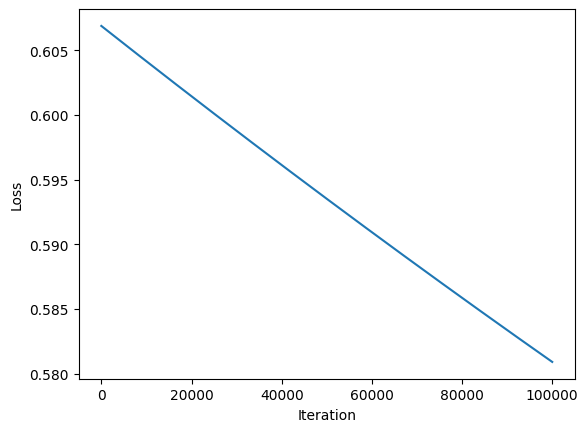

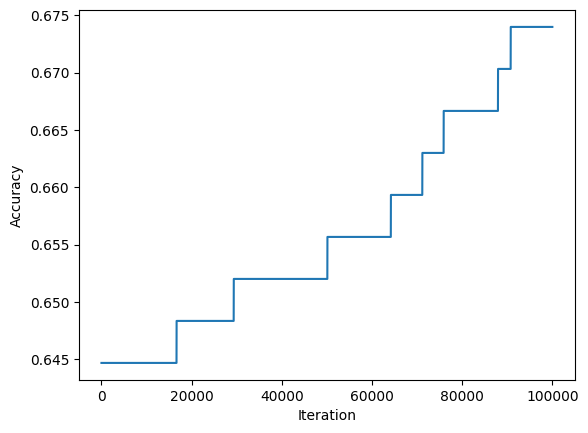

In [57]:
model(learning_rate=1e-6, iterations=100000)

Streaming output truncated to the last 5000 lines.
Iteration: 5004, Loss: 0.2820219605753975
Iteration: 5005, Loss: 0.2820183252432043
Iteration: 5006, Loss: 0.2820146912840629
Iteration: 5007, Loss: 0.2820110586972341
Iteration: 5008, Loss: 0.28200742748197916
Iteration: 5009, Loss: 0.28200379763755995
Iteration: 5010, Loss: 0.28200016916323867
Iteration: 5011, Loss: 0.28199654205827834
Iteration: 5012, Loss: 0.2819929163219422
Iteration: 5013, Loss: 0.2819892919534941
Iteration: 5014, Loss: 0.2819856689521984
Iteration: 5015, Loss: 0.28198204731731996
Iteration: 5016, Loss: 0.2819784270481243
Iteration: 5017, Loss: 0.2819748081438772
Iteration: 5018, Loss: 0.2819711906038451
Iteration: 5019, Loss: 0.281967574427295
Iteration: 5020, Loss: 0.28196395961349413
Iteration: 5021, Loss: 0.28196034616171073
Iteration: 5022, Loss: 0.281956734071213
Iteration: 5023, Loss: 0.28195312334127
Iteration: 5024, Loss: 0.28194951397115114
Iteration: 5025, Loss: 0.2819459059601264
Iteration: 5026, Loss

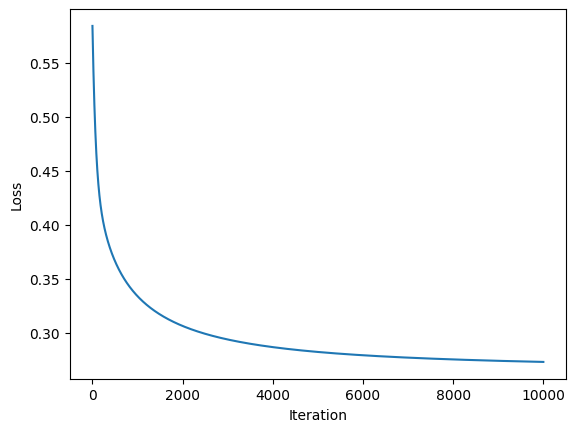

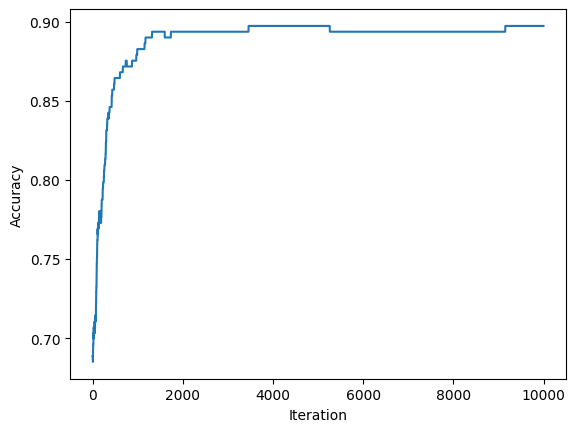

In [58]:
model(learning_rate=0.01, iterations=10000)

Streaming output truncated to the last 5000 lines.
Iteration: 95004, Loss: 0.275347847371388
Iteration: 95005, Loss: 0.2753477177627736
Iteration: 95006, Loss: 0.275347588156915
Iteration: 95007, Loss: 0.275347458553812
Iteration: 95008, Loss: 0.2753473289534645
Iteration: 95009, Loss: 0.2753471993558724
Iteration: 95010, Loss: 0.2753470697610357
Iteration: 95011, Loss: 0.27534694016895417
Iteration: 95012, Loss: 0.27534681057962795
Iteration: 95013, Loss: 0.2753466809930568
Iteration: 95014, Loss: 0.27534655140924064
Iteration: 95015, Loss: 0.27534642182817937
Iteration: 95016, Loss: 0.27534629224987295
Iteration: 95017, Loss: 0.27534616267432127
Iteration: 95018, Loss: 0.27534603310152417
Iteration: 95019, Loss: 0.2753459035314818
Iteration: 95020, Loss: 0.27534577396419385
Iteration: 95021, Loss: 0.27534564439966025
Iteration: 95022, Loss: 0.27534551483788106
Iteration: 95023, Loss: 0.275345385278856
Iteration: 95024, Loss: 0.2753452557225852
Iteration: 95025, Loss: 0.27534512616906

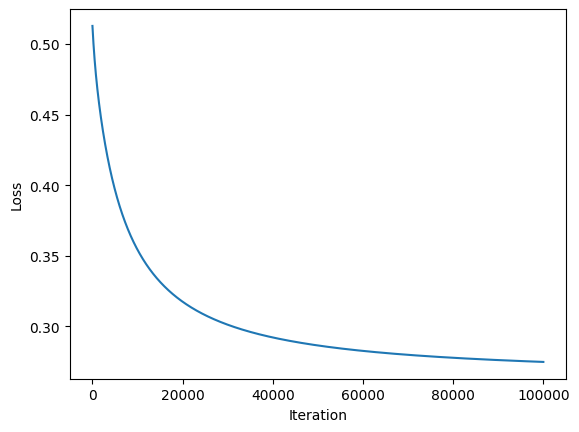

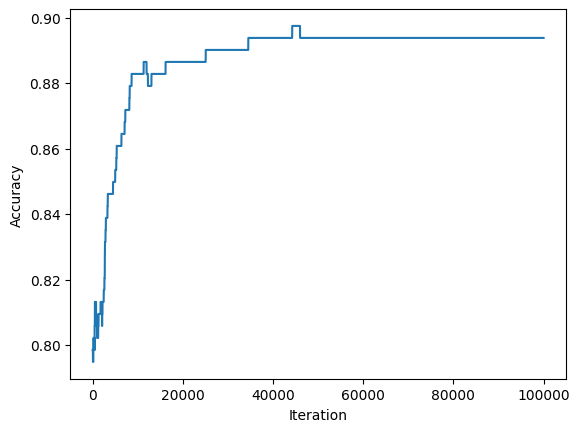

In [59]:
model(learning_rate=0.001, iterations=100000)

Streaming output truncated to the last 5000 lines.
Iteration: 95004, Loss: 0.3583129377339435
Iteration: 95005, Loss: 0.35831227906241225
Iteration: 95006, Loss: 0.3583116203991846
Iteration: 95007, Loss: 0.3583109617442604
Iteration: 95008, Loss: 0.35831030309763945
Iteration: 95009, Loss: 0.35830964445932156
Iteration: 95010, Loss: 0.3583089858293068
Iteration: 95011, Loss: 0.35830832720759476
Iteration: 95012, Loss: 0.35830766859418534
Iteration: 95013, Loss: 0.3583070099890786
Iteration: 95014, Loss: 0.3583063513922742
Iteration: 95015, Loss: 0.3583056928037719
Iteration: 95016, Loss: 0.35830503422357174
Iteration: 95017, Loss: 0.3583043756516735
Iteration: 95018, Loss: 0.358303717088077
Iteration: 95019, Loss: 0.35830305853278216
Iteration: 95020, Loss: 0.3583023999857888
Iteration: 95021, Loss: 0.3583017414470967
Iteration: 95022, Loss: 0.35830108291670576
Iteration: 95023, Loss: 0.3583004243946158
Iteration: 95024, Loss: 0.3582997658808267
Iteration: 95025, Loss: 0.3582991073753

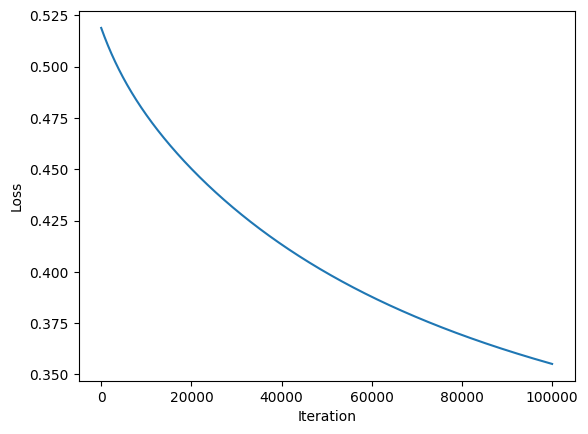

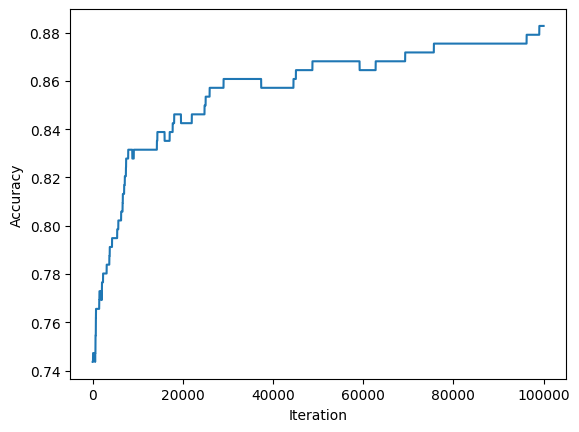

In [60]:
model(learning_rate=0.0001, iterations=100000)

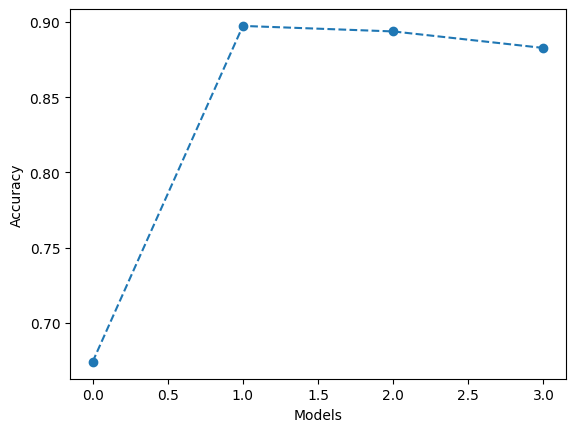

In [61]:
plt.plot(b, 'o--')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()